# Buttocks Pattern Analysis

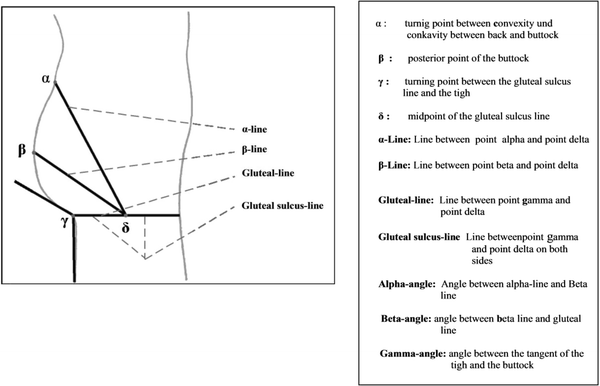

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.metrics import confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('buttocks_pattern_analysis.csv')

In [4]:
df.head()

Participant_ID  Age  Height_cm  Weight_kg   BMI  Gym_Visits_per_Week  \
0           P001   24     163.40       55.9  22.1                    2   
1           P002   37     155.57       88.9  29.0                    2   
2           P003   32     181.76       81.1  21.5                    3   
3           P004   28     174.80       88.2  23.6                    4   
4           P005   25     171.34       67.0  28.7                    3   

   Workout_Duration_Min Workout_Types  Buttock_Circumference_cm  \
0                   108        Cardio                     84.28   
1                    47      Strength                    111.23   
2                    31        Cardio                    116.41   
3                    42        Cardio                     95.31   
4                    33      Strength                    105.23   

   Buttock_Height_cm  ...  Gluteal_Fold_Depth_cm  Shape_Type  \
0              19.56  ...                   2.01        Pear   
1              16.30  ...                   1.69      Square   
2              15.02  ...                   4.83       Heart   
3              21.74  ...                   4.42        Pear   
4              27.55  ...                   1.92       Heart   

  Buttock_Asymmetry_Index  Glute_Activation_Level Hip_Circumference_cm  \
0                    0.40                     Low                83.94   
1                    4.03                     Low               119.18   
2                    9.35                    High                91.84   
3                    0.12                    High               114.84   
4                    5.88                    High                80.17   

   Waist_Circumference_cm  Body_Fat_Percentage  Muscle_Mass_kg     Diet_Type  \
0                   77.06                 18.7            48.0      Low Carb   
1                   97.58                 17.1            38.4      Low Carb   
2                   77.14                 23.4            37.8  High Protein   
3                   74.33                 17.8            31.6      Balanced   
4                   77.62                 15.6            48.4    Vegetarian   

       Fitness_Goals  
0        Muscle Gain  
1             Health  
2        Weight Loss  
3        Weight Loss  
4  Improve Endurance  

[5 rows x 21 columns]

In [5]:
df.tail()

Participant_ID  Age  Height_cm  Weight_kg   BMI  Gym_Visits_per_Week  \
995           P996   23     180.41       81.5  22.8                    2   
996           P997   23     155.48       73.6  28.6                    5   
997           P998   20     171.41       62.5  28.7                    6   
998           P999   24     158.61       75.3  28.9                    6   
999          P1000   36     150.48       56.7  21.8                    5   

     Workout_Duration_Min  Workout_Types  Buttock_Circumference_cm  \
995                   109         Cardio                     82.96   
996                    93    Flexibility                    119.71   
997                    59    Flexibility                     96.32   
998                    65  Group Classes                     91.50   
999                    96         Cardio                    102.32   

     Buttock_Height_cm  ...  Gluteal_Fold_Depth_cm  Shape_Type  \
995              26.12  ...                   2.23      Square   
996              19.54  ...                   1.14      Square   
997              24.94  ...                   4.73       Round   
998              17.37  ...                   2.38       Round   
999              25.32  ...                   1.43       Heart   

    Buttock_Asymmetry_Index  Glute_Activation_Level Hip_Circumference_cm  \
995                    3.51                Moderate               104.52   
996                    3.61                     Low                82.24   
997                    8.52                Moderate               100.26   
998                    5.54                    High               114.84   
999                    7.18                     Low                88.54   

     Waist_Circumference_cm  Body_Fat_Percentage  Muscle_Mass_kg  \
995                   89.46                 20.5            39.4   
996                   97.01                 26.0            45.6   
997                   77.87                 22.7            44.5   
998                   66.93                 26.1            47.2   
999                   61.91                 28.6            48.2   

        Diet_Type      Fitness_Goals  
995    Vegetarian  Improve Endurance  
996    Vegetarian             Health  
997    Vegetarian  Improve Endurance  
998  High Protein        Weight Loss  
999      Balanced  Improve Endurance  

[5 rows x 21 columns]

In [6]:
df = df.drop(['Participant_ID'], axis =1)

In [7]:
df.shape

(1000, 20)

In [8]:
df.columns

Index(['Age', 'Height_cm', 'Weight_kg', 'BMI', 'Gym_Visits_per_Week',
       'Workout_Duration_Min', 'Workout_Types', 'Buttock_Circumference_cm',
       'Buttock_Height_cm', 'Buttock_Projection_cm', 'Gluteal_Fold_Depth_cm',
       'Shape_Type', 'Buttock_Asymmetry_Index', 'Glute_Activation_Level',
       'Hip_Circumference_cm', 'Waist_Circumference_cm', 'Body_Fat_Percentage',
       'Muscle_Mass_kg', 'Diet_Type', 'Fitness_Goals'],
      dtype='object')

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Age                         0
Height_cm                   0
Weight_kg                   0
BMI                         0
Gym_Visits_per_Week         0
Workout_Duration_Min        0
Workout_Types               0
Buttock_Circumference_cm    0
Buttock_Height_cm           0
Buttock_Projection_cm       0
Gluteal_Fold_Depth_cm       0
Shape_Type                  0
Buttock_Asymmetry_Index     0
Glute_Activation_Level      0
Hip_Circumference_cm        0
Waist_Circumference_cm      0
Body_Fat_Percentage         0
Muscle_Mass_kg              0
Diet_Type                   0
Fitness_Goals               0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1000 non-null   int64  
 1   Height_cm                 1000 non-null   float64
 2   Weight_kg                 1000 non-null   float64
 3   BMI                       1000 non-null   float64
 4   Gym_Visits_per_Week       1000 non-null   int64  
 5   Workout_Duration_Min      1000 non-null   int64  
 6   Workout_Types             1000 non-null   object 
 7   Buttock_Circumference_cm  1000 non-null   float64
 8   Buttock_Height_cm         1000 non-null   float64
 9   Buttock_Projection_cm     1000 non-null   float64
 10  Gluteal_Fold_Depth_cm     1000 non-null   float64
 11  Shape_Type                1000 non-null   object 
 12  Buttock_Asymmetry_Index   1000 non-null   float64
 13  Glute_Activation_Level    1000 non-null   object 
 14  Hip_Circu

In [12]:
df.describe()

Age   Height_cm    Weight_kg          BMI  Gym_Visits_per_Week  \
count  1000.000000  1000.00000  1000.000000  1000.000000           1000.00000   
mean     28.231000   169.97997    67.459100    23.994900              4.05500   
std       6.538378    11.69832    12.942327     3.471088              1.40426   
min      18.000000   150.19000    45.000000    18.000000              2.00000   
25%      22.000000   159.34750    56.775000    21.000000              3.00000   
50%      28.000000   170.27000    67.500000    24.000000              4.00000   
75%      34.000000   179.81750    78.725000    27.000000              5.00000   
max      39.000000   189.98000    89.900000    30.000000              6.00000   

       Workout_Duration_Min  Buttock_Circumference_cm  Buttock_Height_cm  \
count           1000.000000               1000.000000        1000.000000   
mean              75.675000                 99.881910          22.347880   
std               26.375007                 11.571781           4.294242   
min               30.000000                 80.150000          15.000000   
25%               52.000000                 89.827500          18.620000   
50%               78.000000                 99.825000          22.265000   
75%               99.000000                110.250000          25.942500   
max              119.000000                119.980000          29.990000   

       Buttock_Projection_cm  Gluteal_Fold_Depth_cm  Buttock_Asymmetry_Index  \
count            1000.000000            1000.000000              1000.000000   
mean                9.794800               2.968210                 5.159800   
std                 2.841823               1.118882                 2.850551   
min                 5.000000               1.000000                 0.020000   
25%                 7.337500               2.050000                 2.790000   
50%                 9.560000               2.970000                 5.230000   
75%                12.145000               3.902500                 7.640000   
max                14.960000               4.990000                10.000000   

       Hip_Circumference_cm  Waist_Circumference_cm  Body_Fat_Percentage  \
count            1000.00000             1000.000000          1000.000000   
mean               99.86597               79.713900            22.553700   
std                11.57304               11.728268             4.395576   
min                80.05000               60.050000            15.000000   
25%                89.75750               69.407500            18.700000   
50%                99.52500               79.255000            22.500000   
75%               110.21500               89.870000            26.500000   
max               119.95000               99.950000            30.000000   

       Muscle_Mass_kg  
count     1000.000000  
mean        37.281800  
std          7.249207  
min         25.000000  
25%         30.900000  
50%         37.300000  
75%         43.700000  
max         50.000000

In [13]:
df.nunique()

Age                          22
Height_cm                   878
Weight_kg                   406
BMI                         121
Gym_Visits_per_Week           5
Workout_Duration_Min         90
Workout_Types                 4
Buttock_Circumference_cm    891
Buttock_Height_cm           730
Buttock_Projection_cm       647
Gluteal_Fold_Depth_cm       365
Shape_Type                    4
Buttock_Asymmetry_Index     610
Glute_Activation_Level        3
Hip_Circumference_cm        878
Waist_Circumference_cm      889
Body_Fat_Percentage         151
Muscle_Mass_kg              249
Diet_Type                     4
Fitness_Goals                 4
dtype: int64

In [14]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns => ")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns => ")
print(numerical_columns)

Object type columns => 
Index(['Workout_Types', 'Shape_Type', 'Glute_Activation_Level', 'Diet_Type',
       'Fitness_Goals'],
      dtype='object')

Numerical type columns => 
Index(['Age', 'Height_cm', 'Weight_kg', 'BMI', 'Gym_Visits_per_Week',
       'Workout_Duration_Min', 'Buttock_Circumference_cm', 'Buttock_Height_cm',
       'Buttock_Projection_cm', 'Gluteal_Fold_Depth_cm',
       'Buttock_Asymmetry_Index', 'Hip_Circumference_cm',
       'Waist_Circumference_cm', 'Body_Fat_Percentage', 'Muscle_Mass_kg'],
      dtype='object')


In [15]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [16]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [17]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['Workout_Types', 'Shape_Type', 'Glute_Activation_Level', 'Diet_Type', 'Fitness_Goals']
Non-Categorical Features: []
Discrete Features: ['Gym_Visits_per_Week']
Continuous Features: ['Age', 'Height_cm', 'Weight_kg', 'BMI', 'Workout_Duration_Min', 'Buttock_Circumference_cm', 'Buttock_Height_cm', 'Buttock_Projection_cm', 'Gluteal_Fold_Depth_cm', 'Buttock_Asymmetry_Index', 'Hip_Circumference_cm', 'Waist_Circumference_cm', 'Body_Fat_Percentage', 'Muscle_Mass_kg']


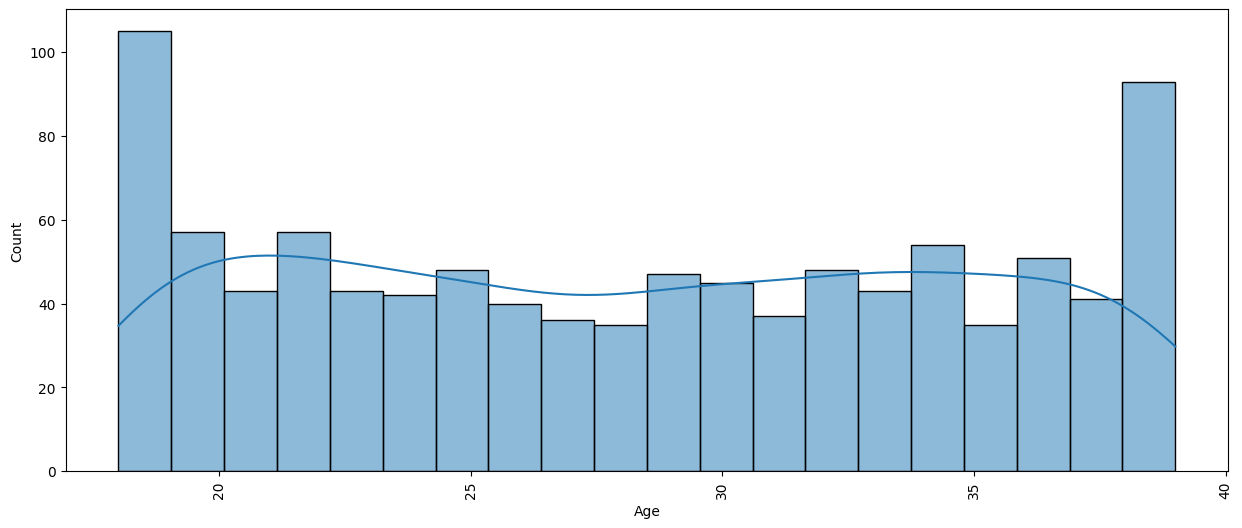

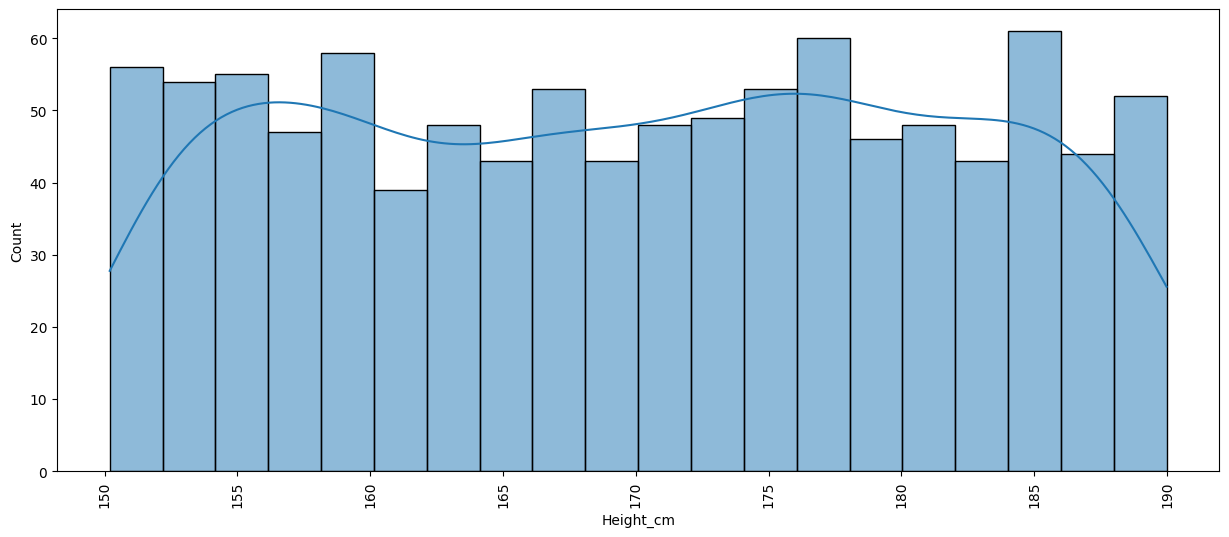

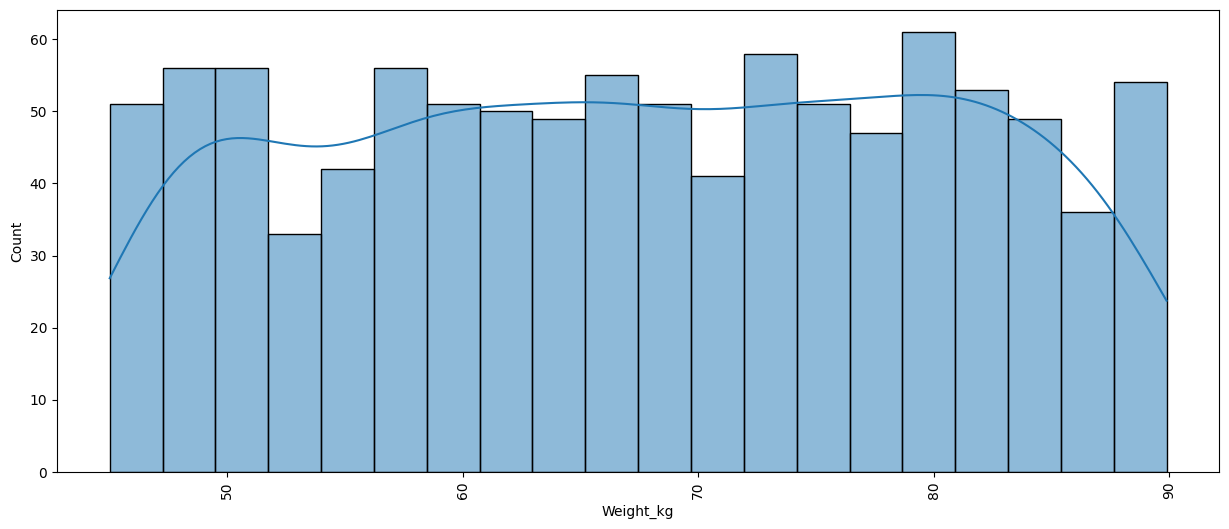

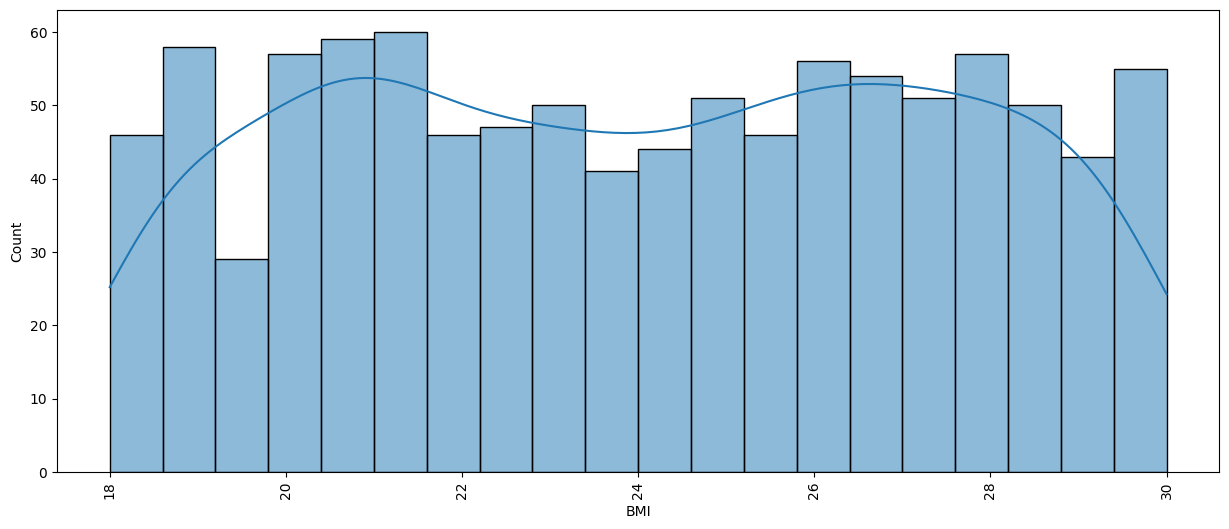

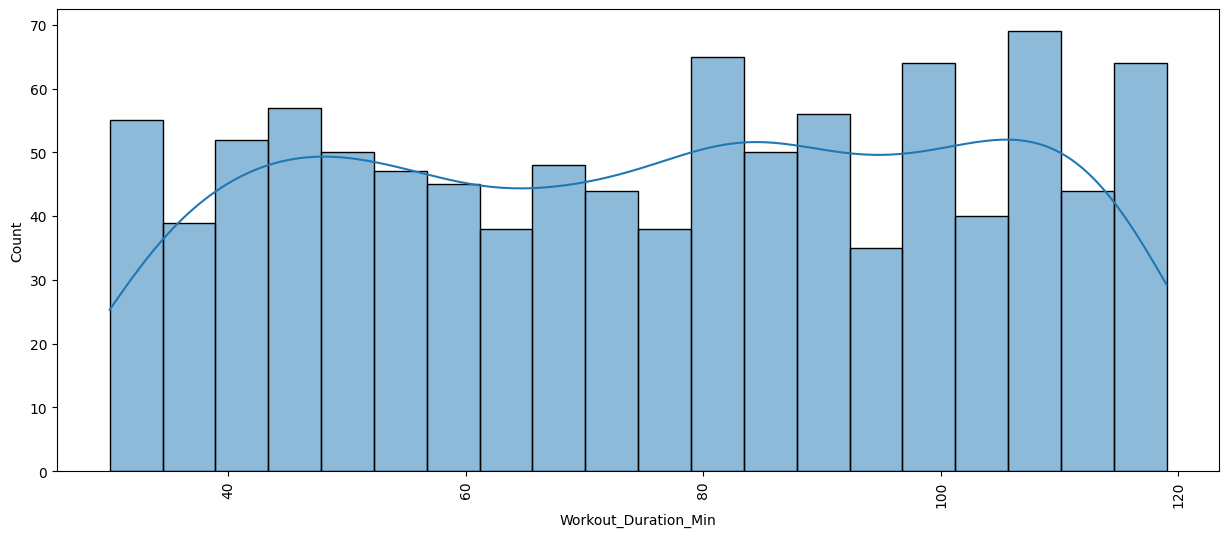

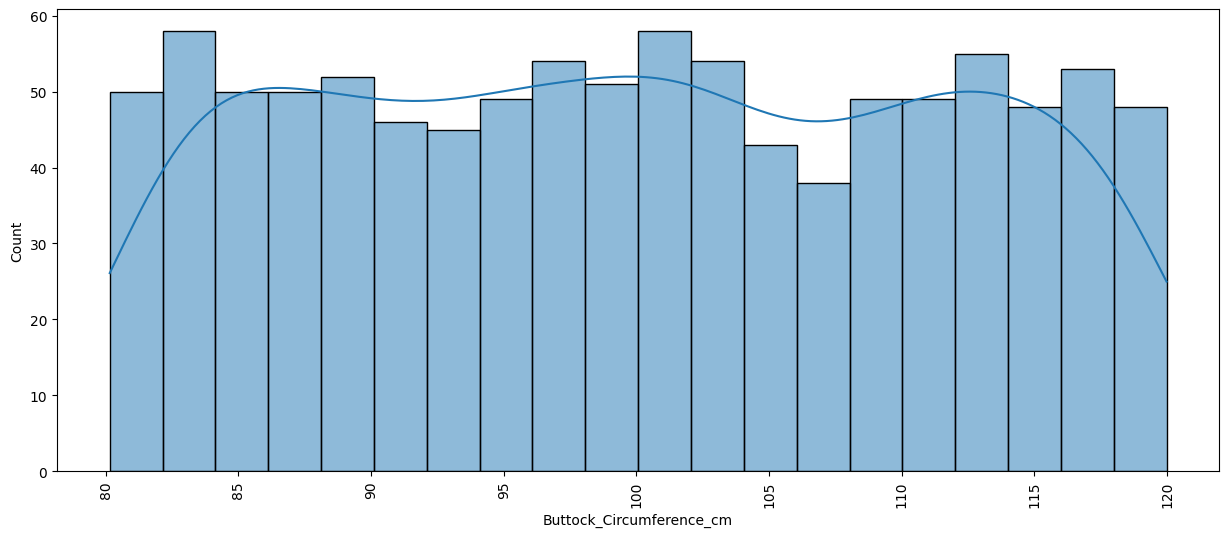

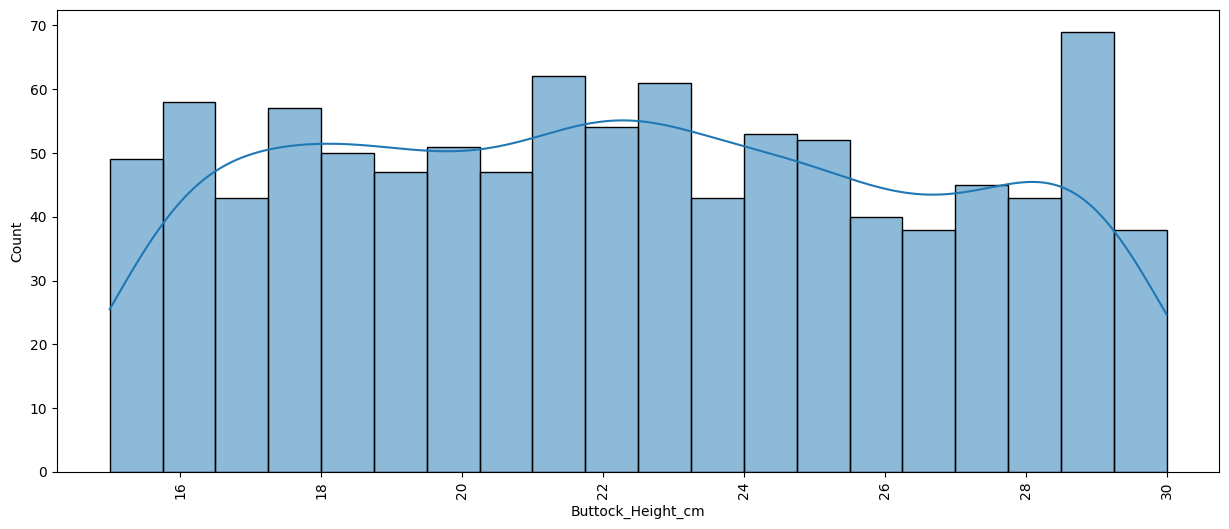

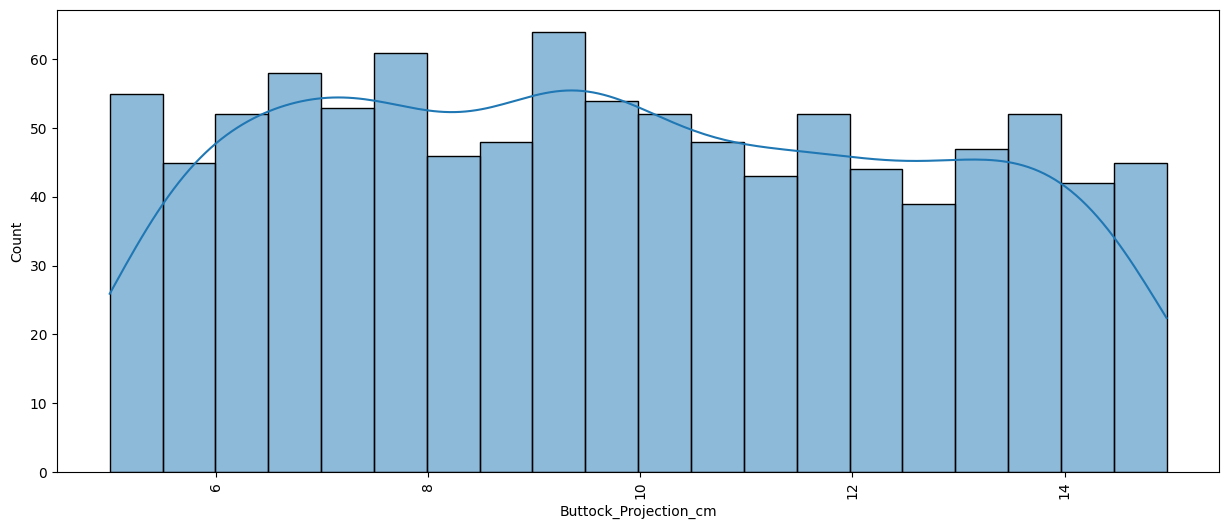

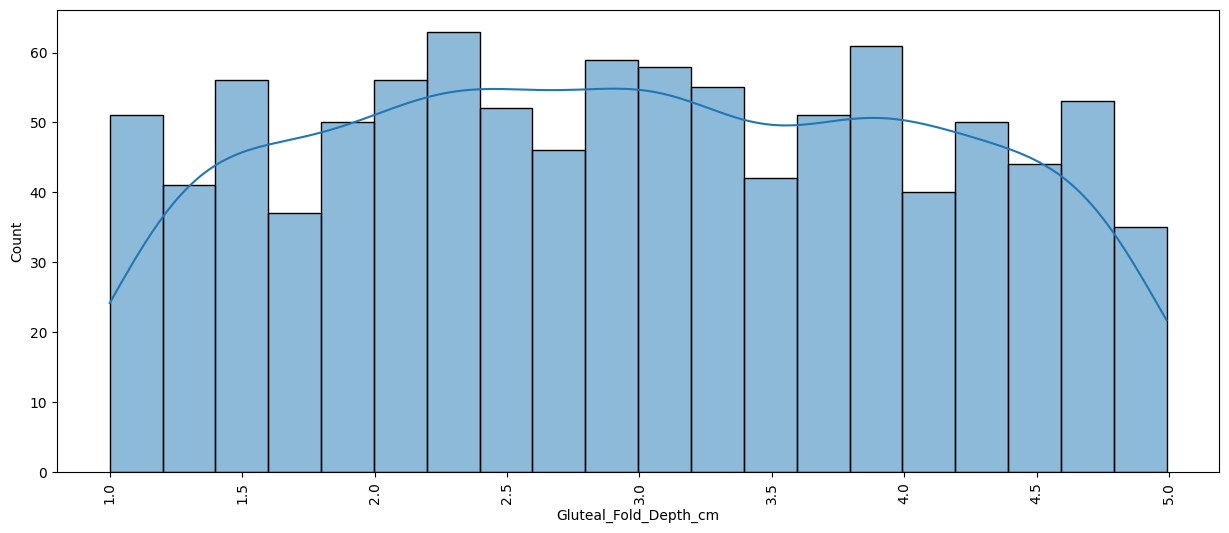

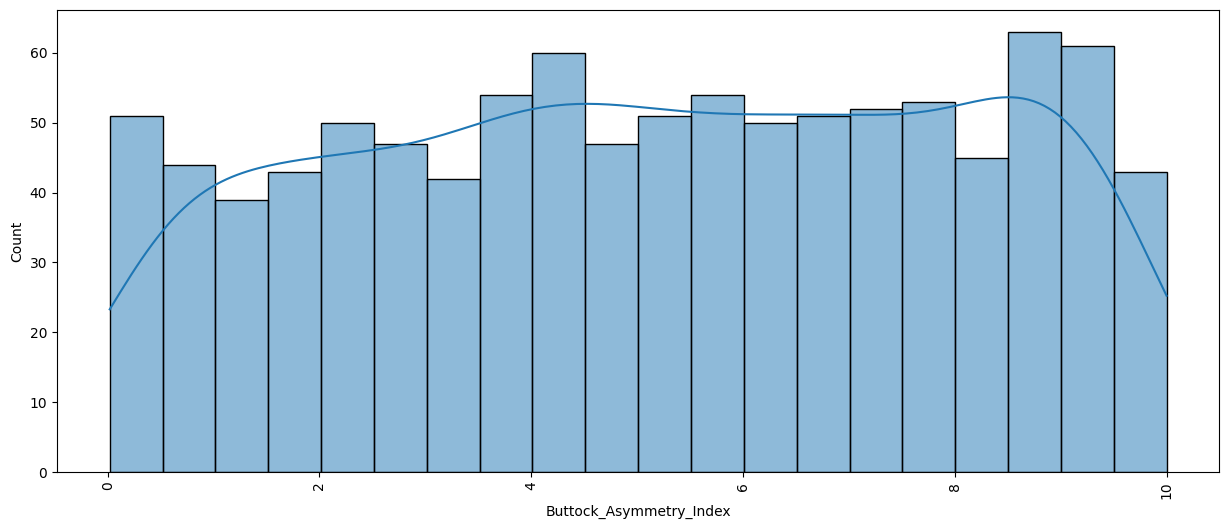

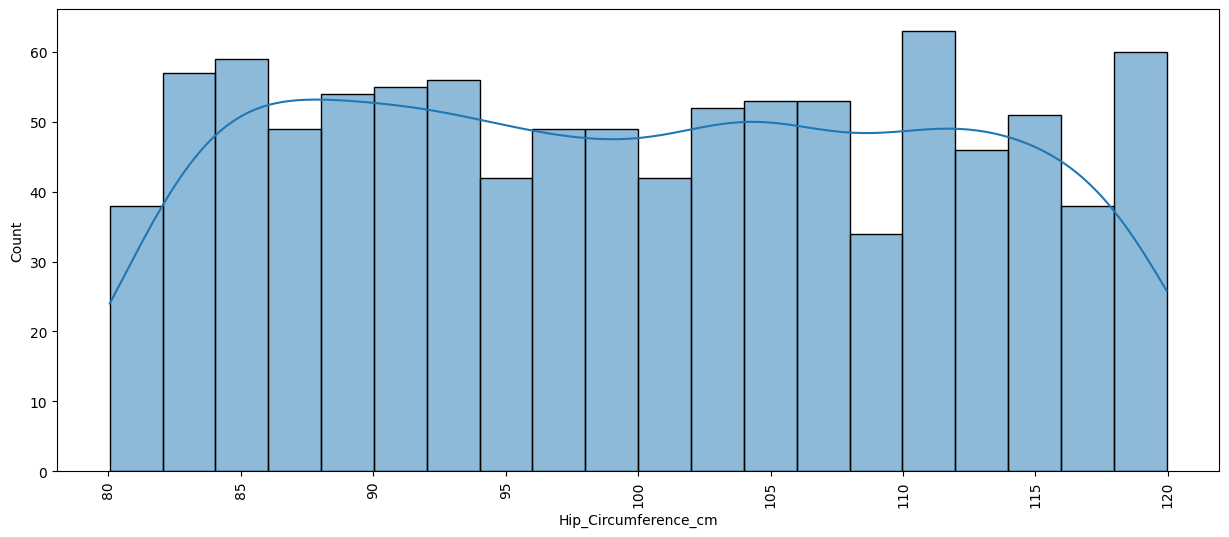

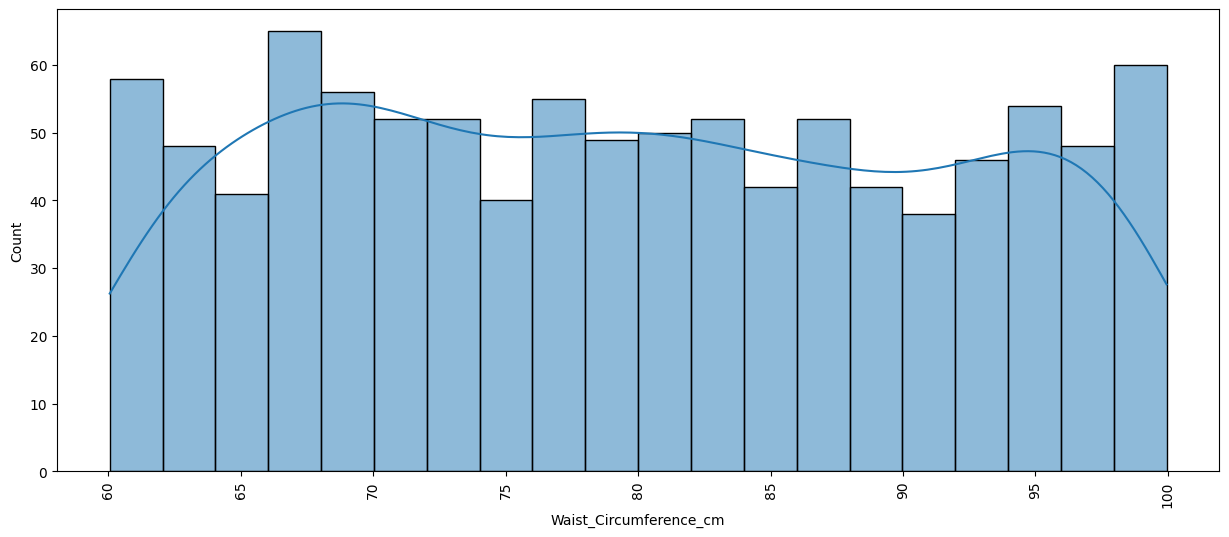

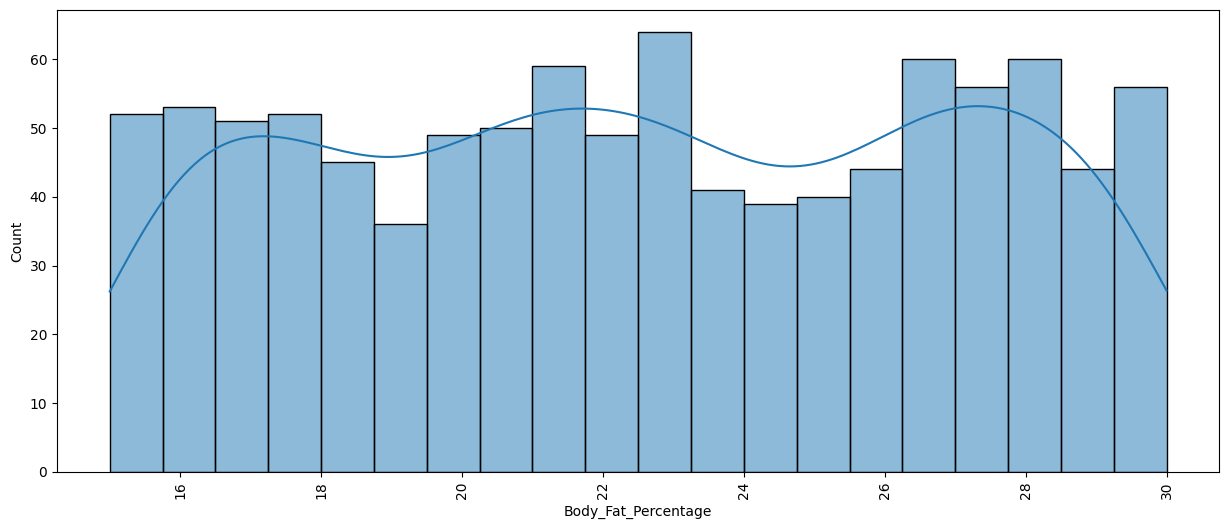

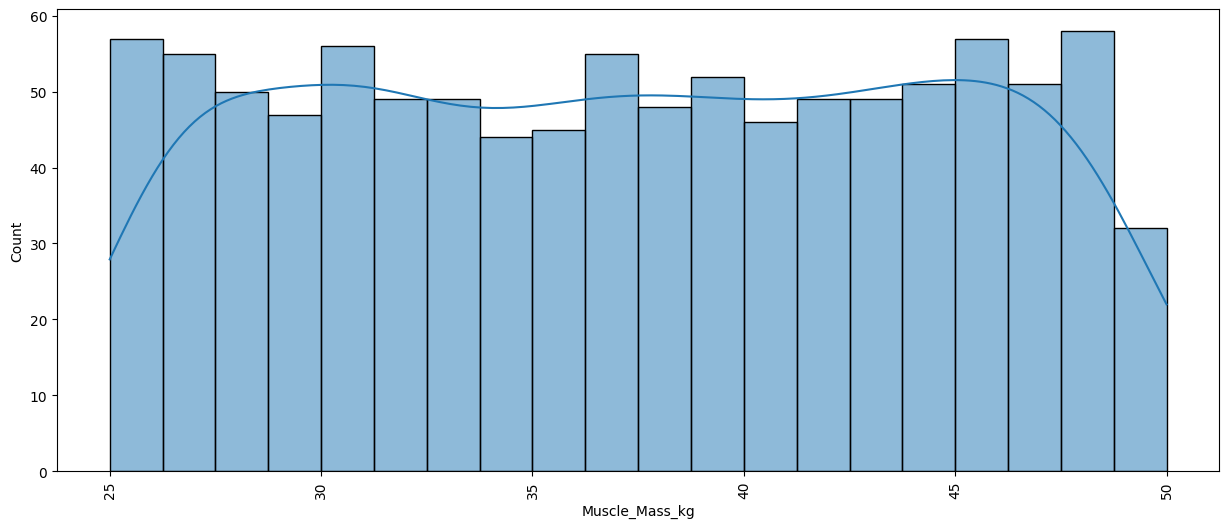

In [18]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

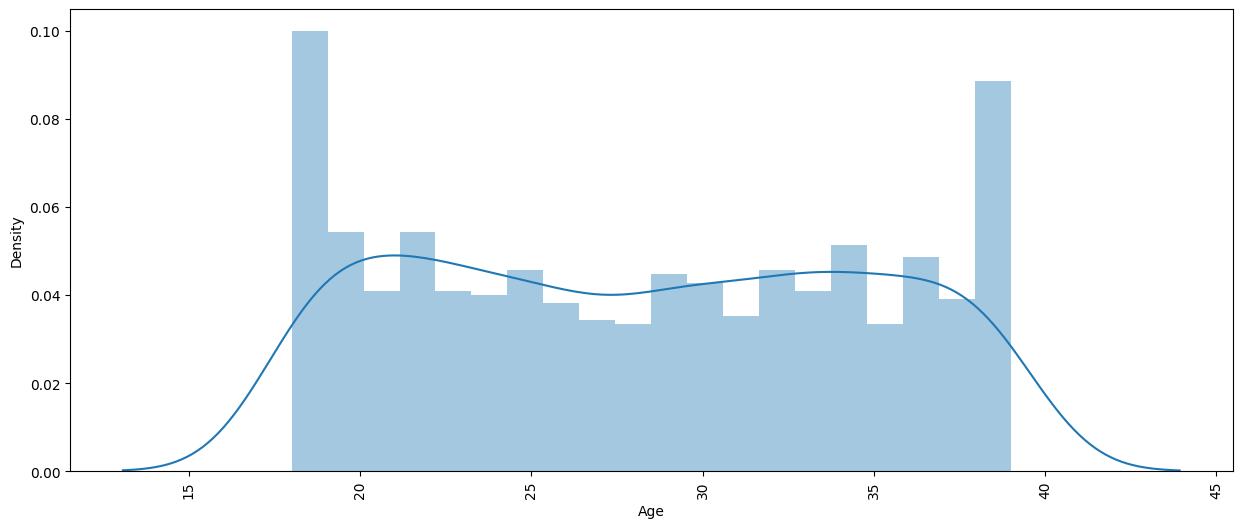

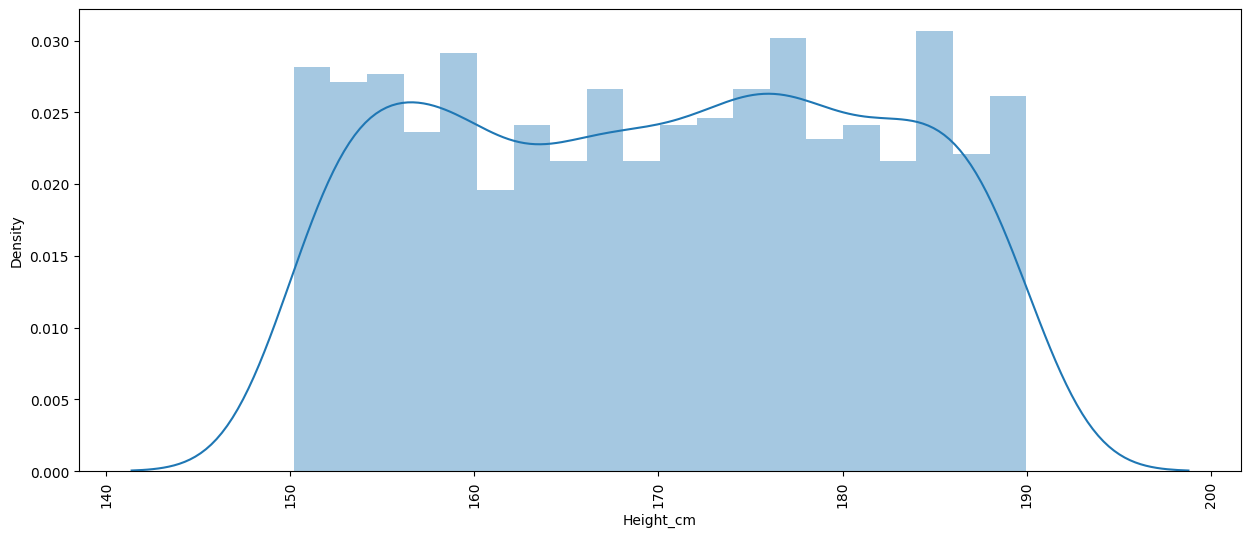

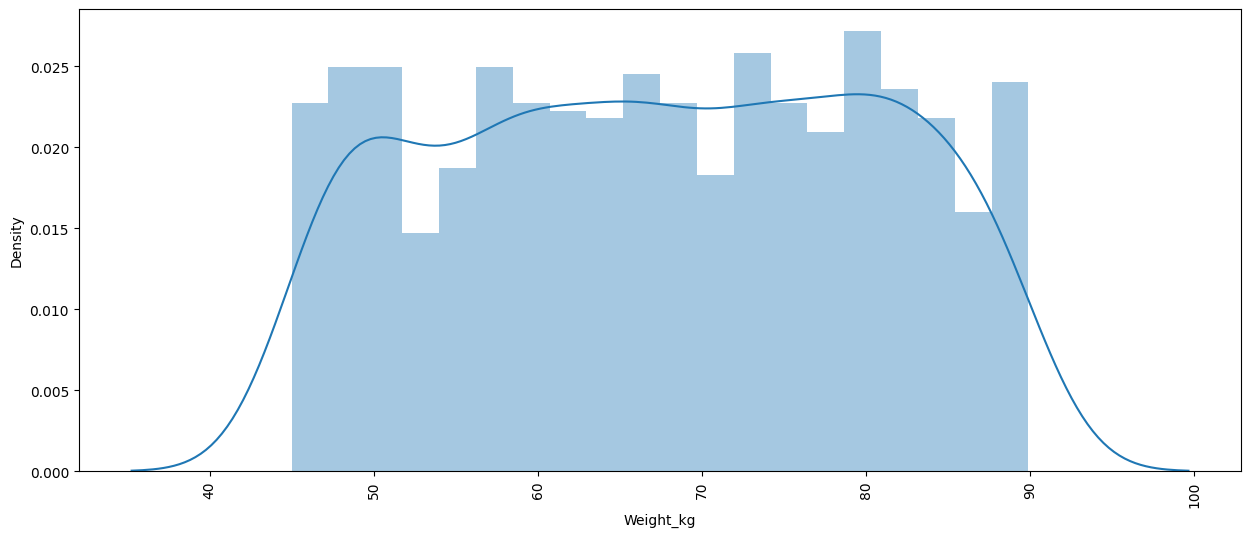

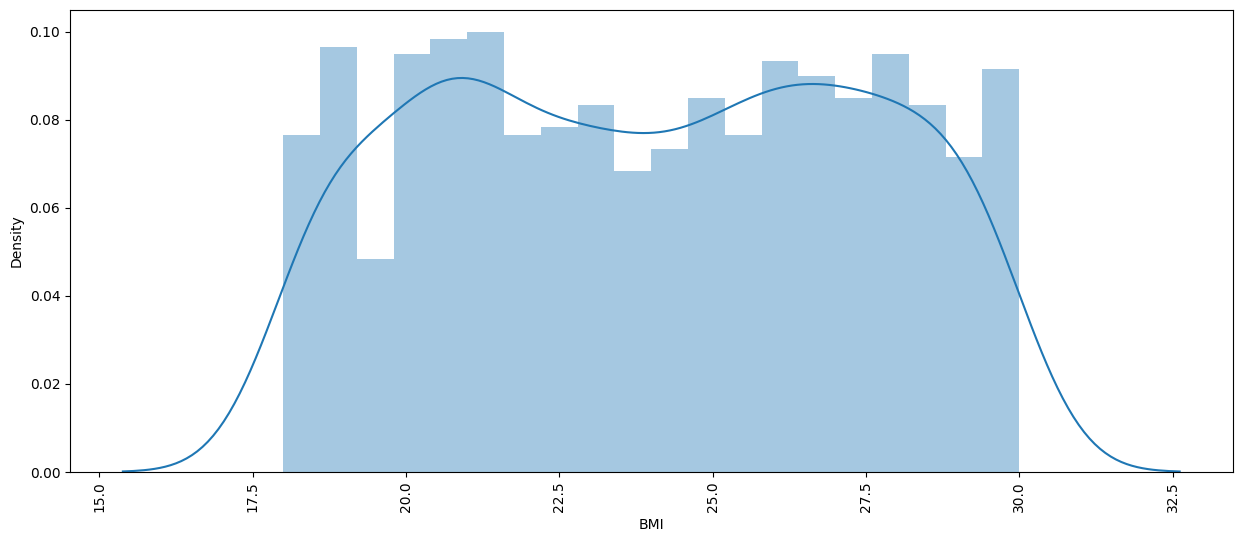

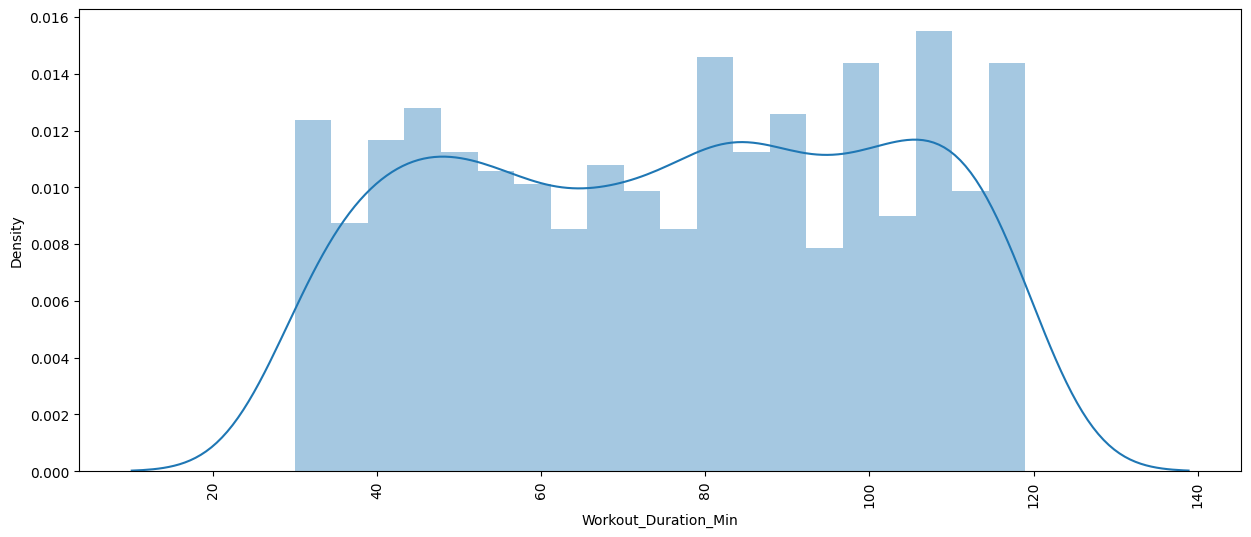

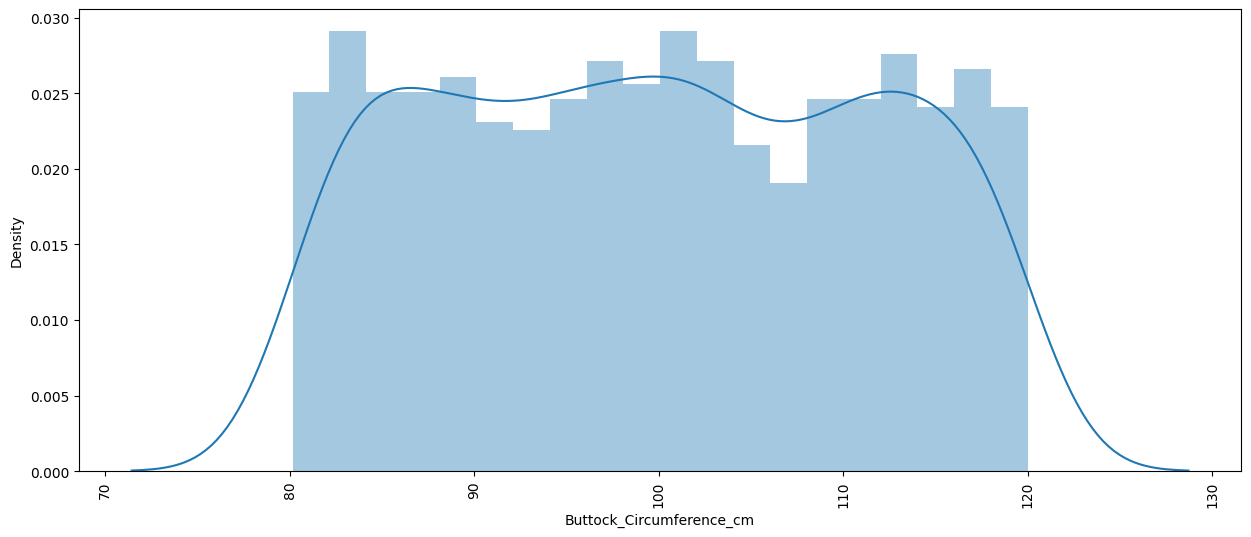

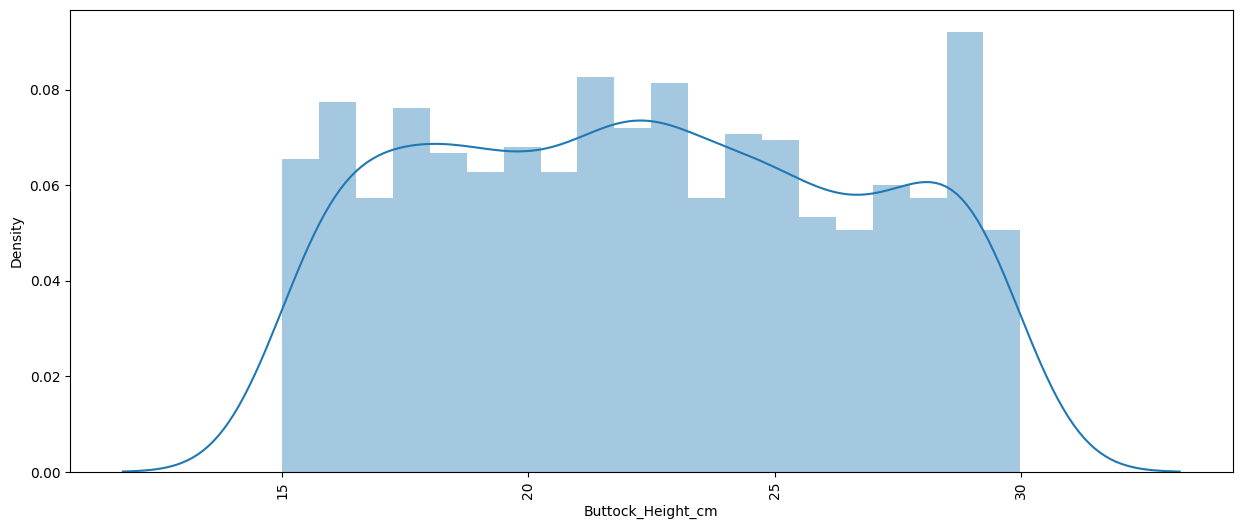

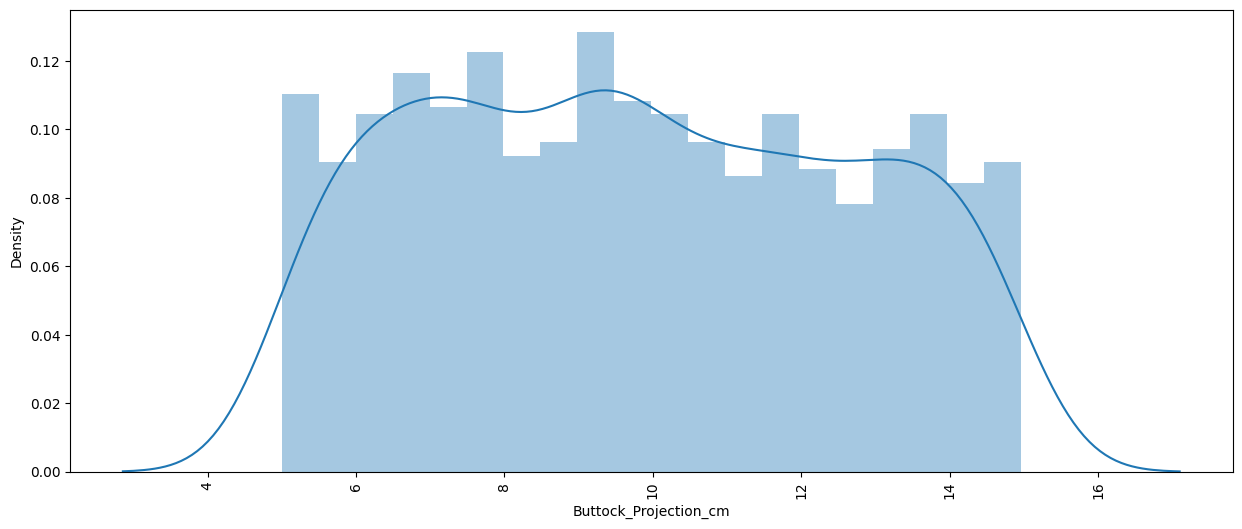

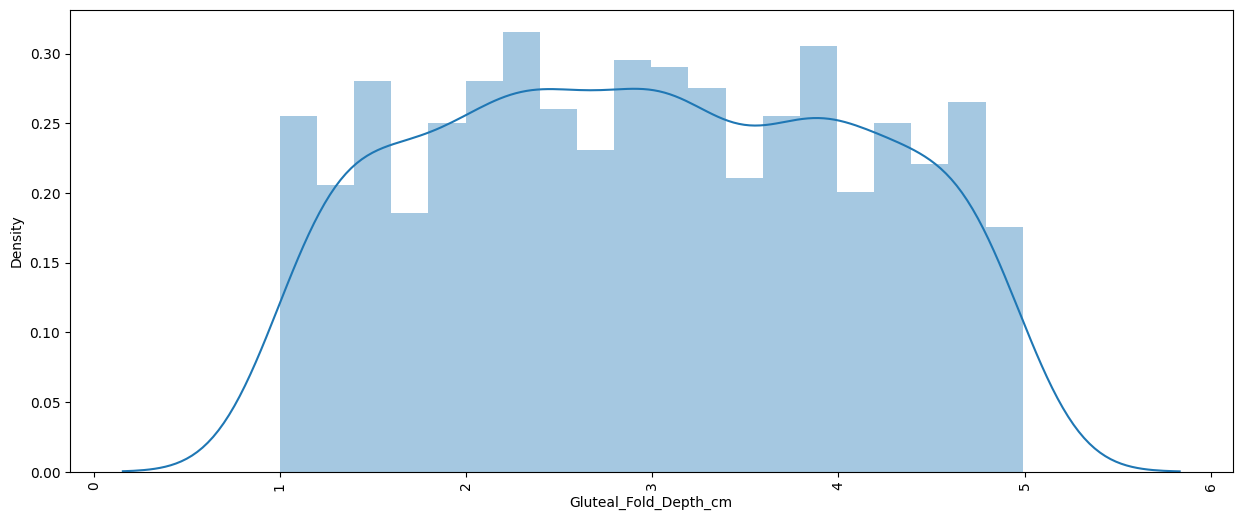

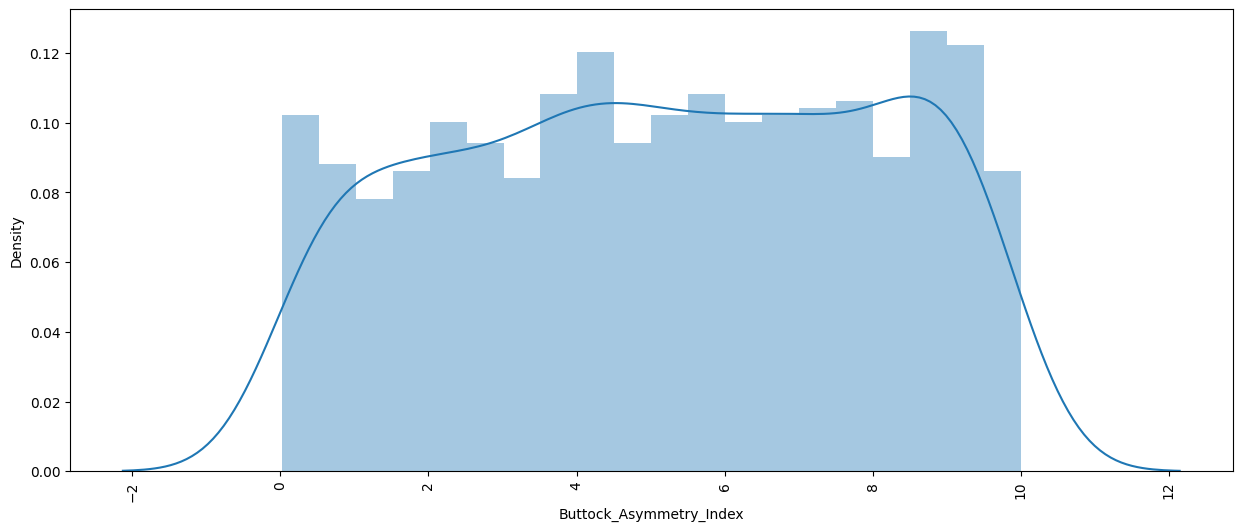

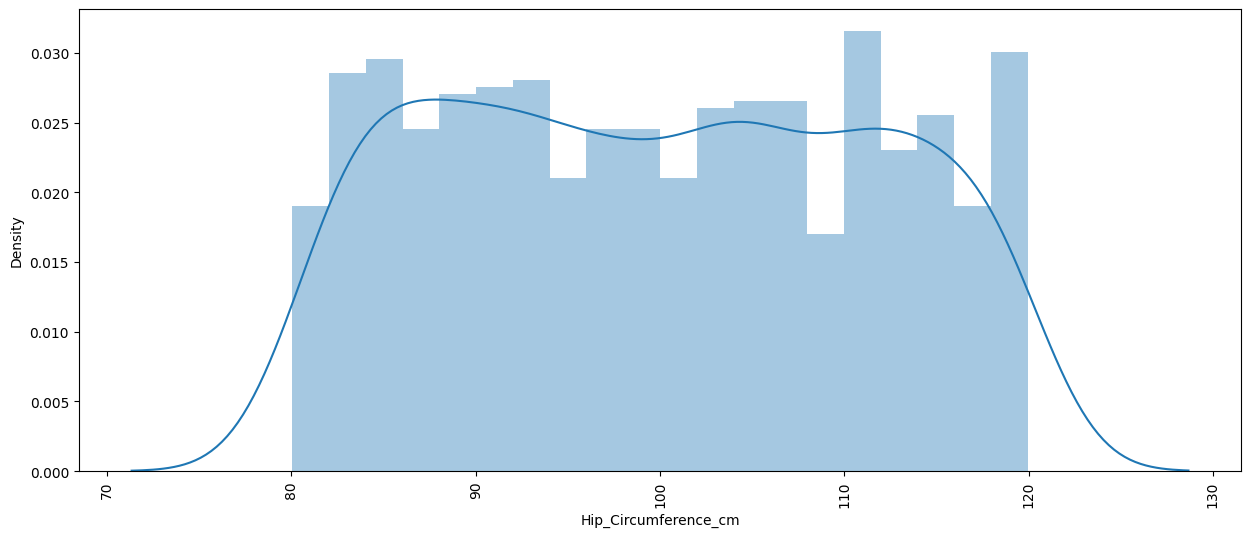

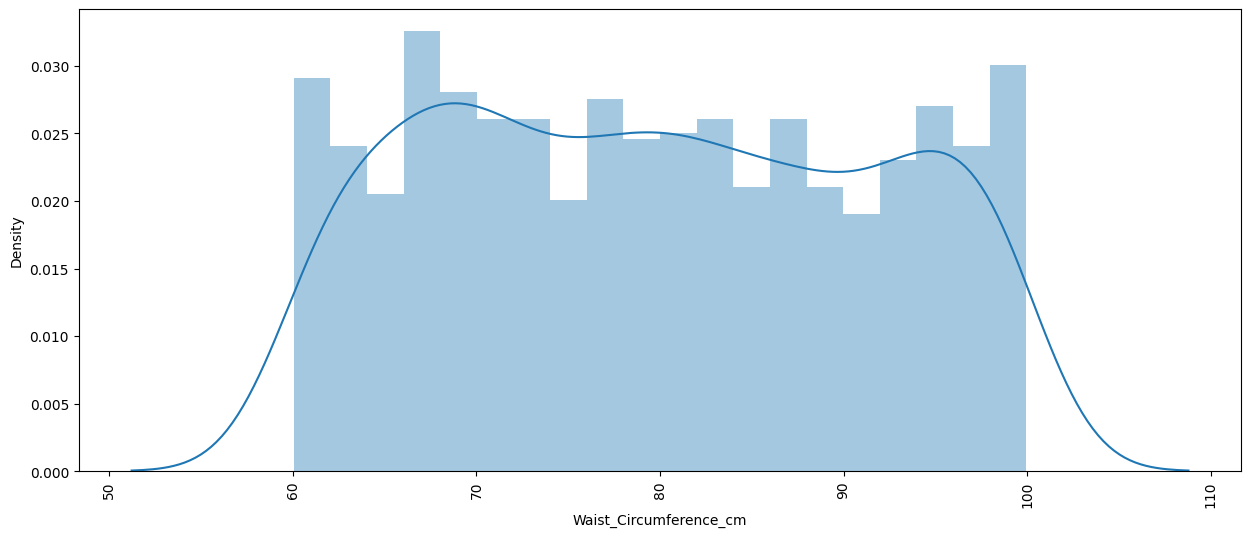

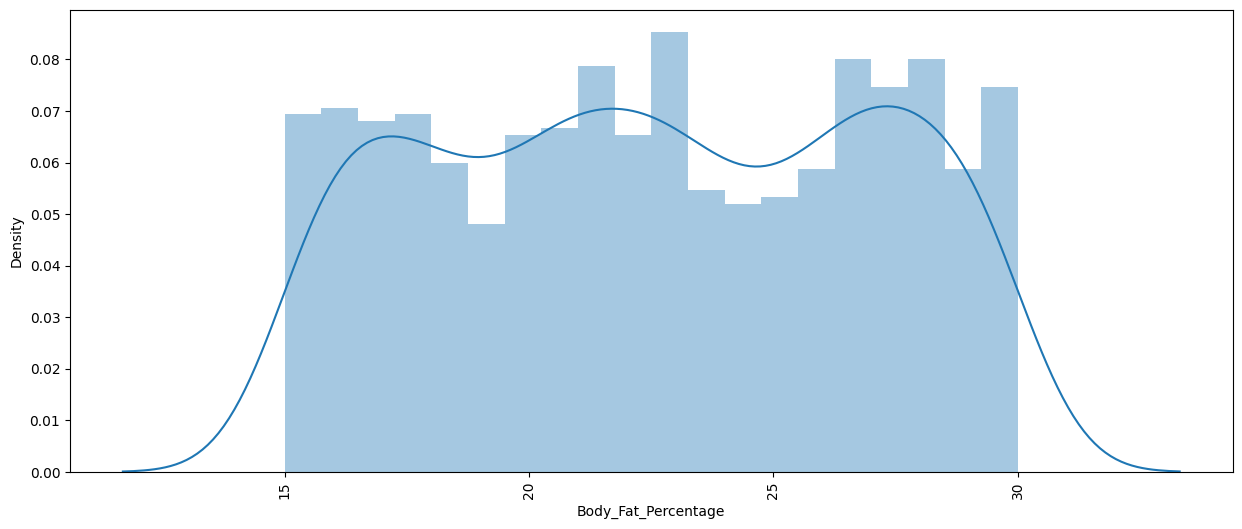

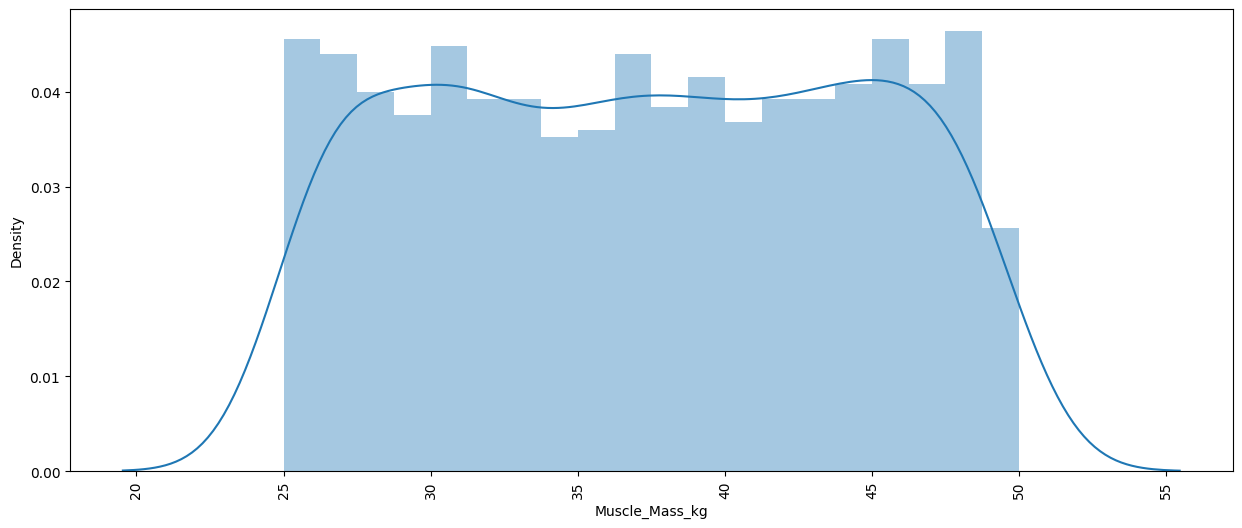

In [19]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins = 20, kde = True)
    plt.xticks(rotation = 90)
    plt.show()

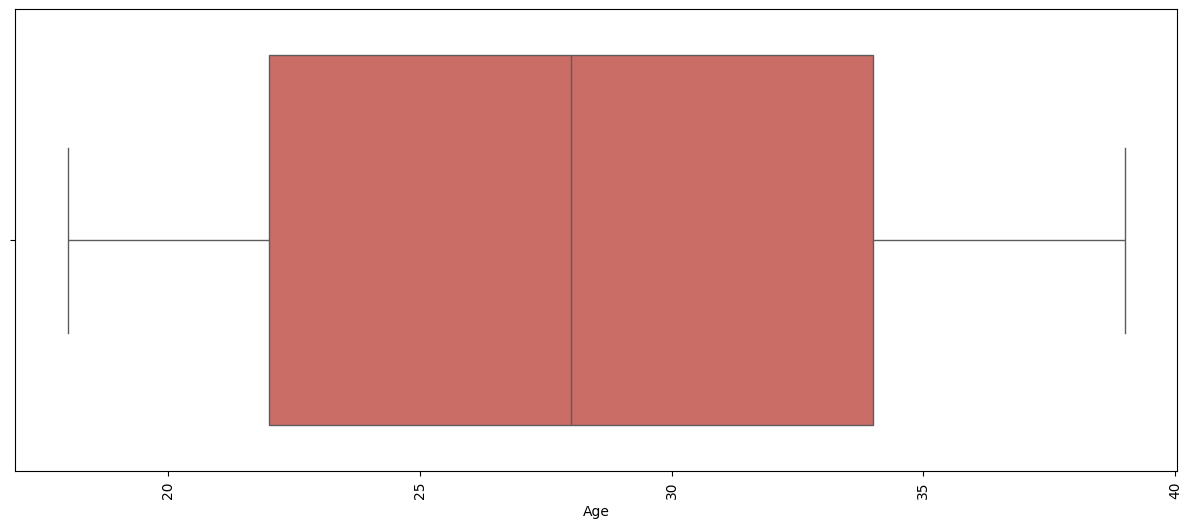

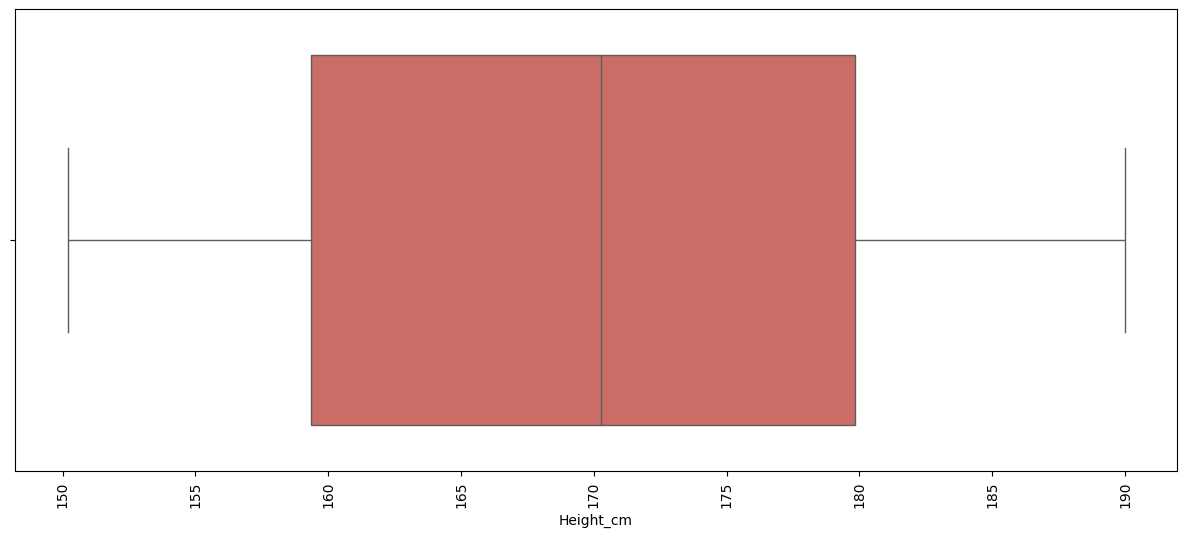

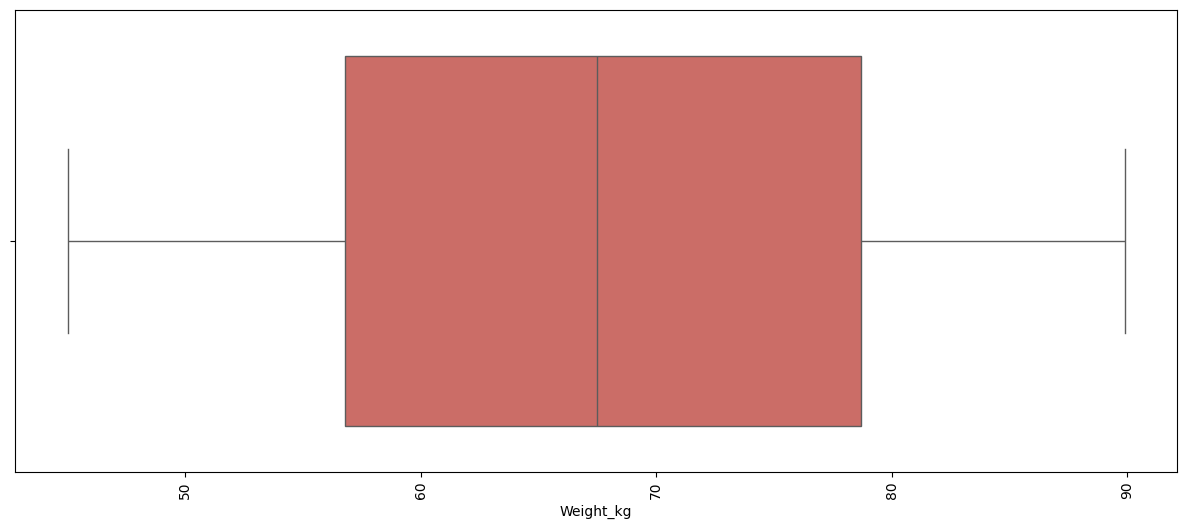

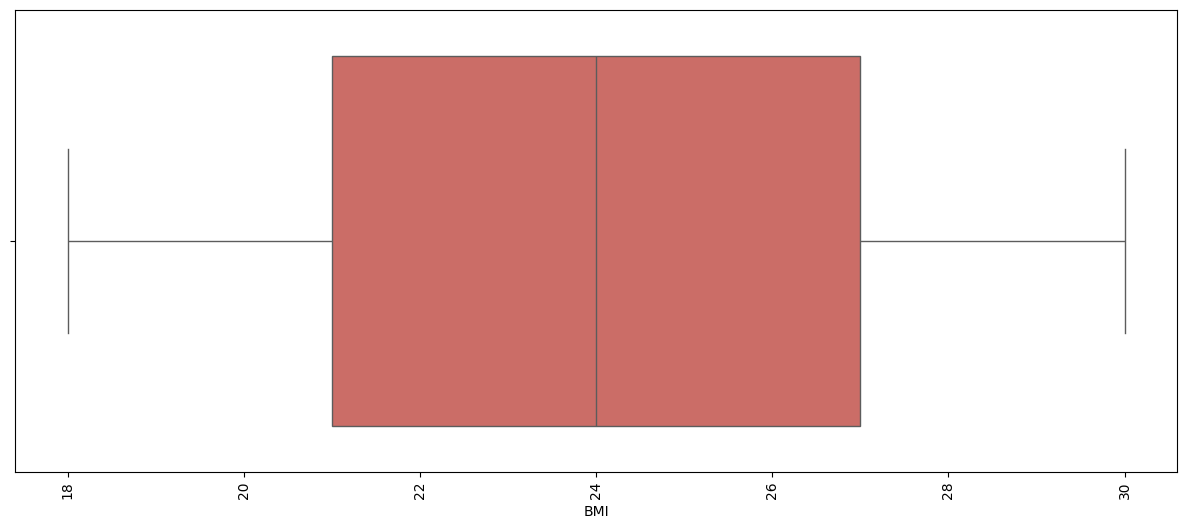

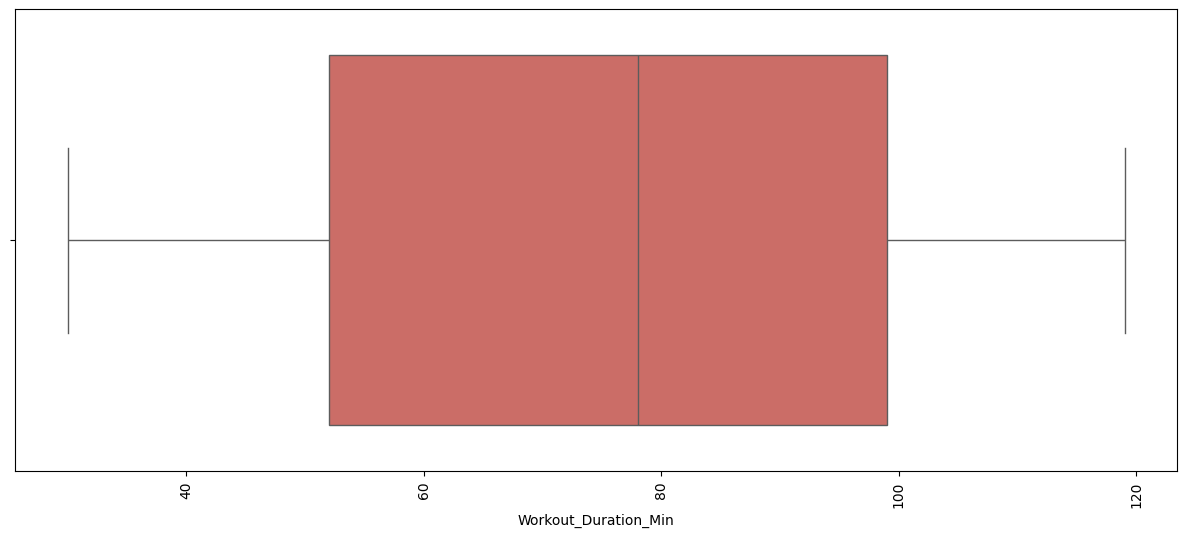

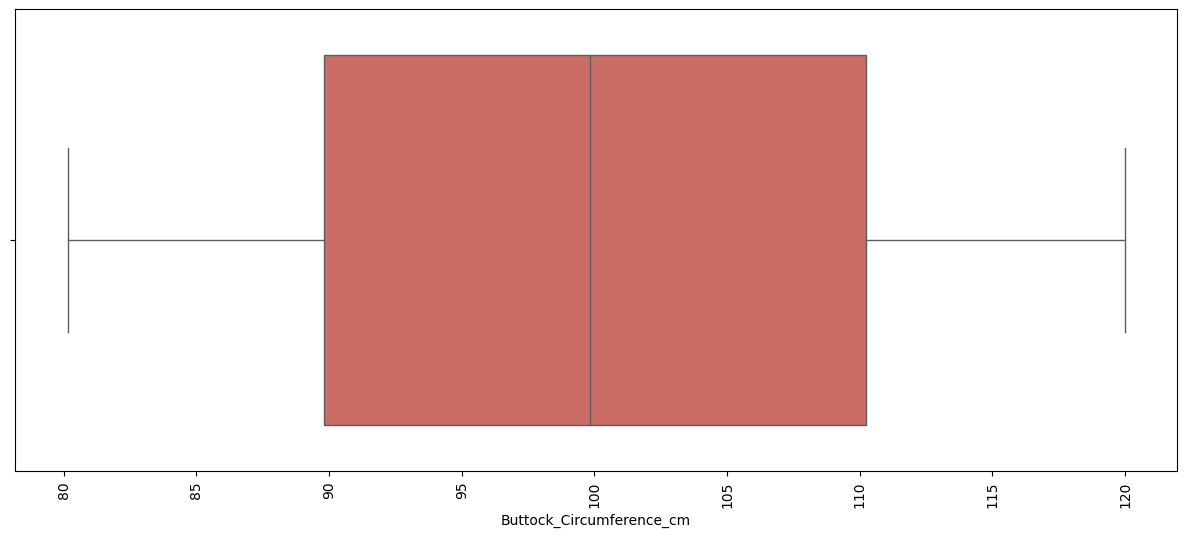

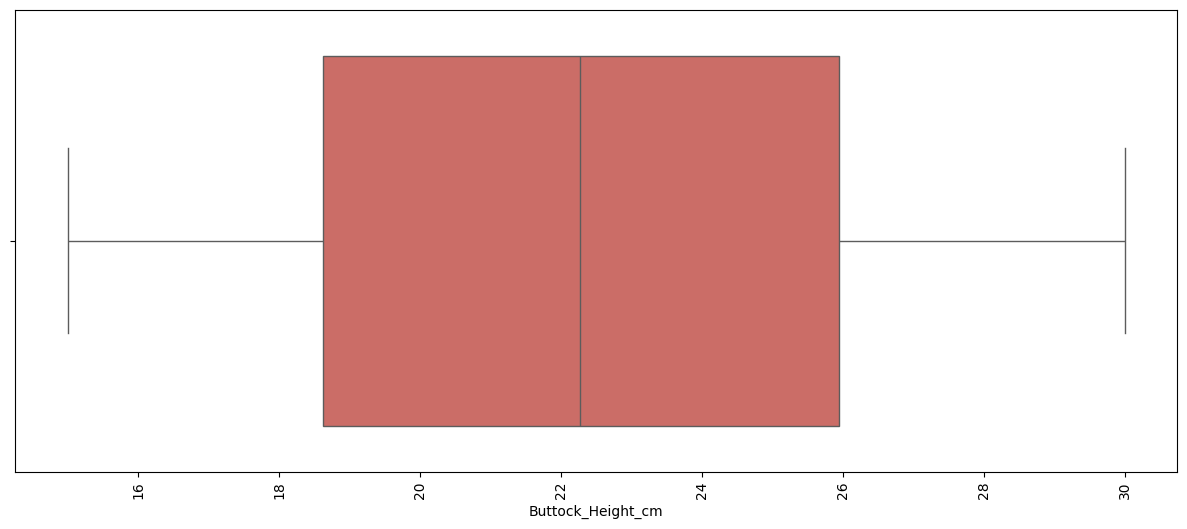

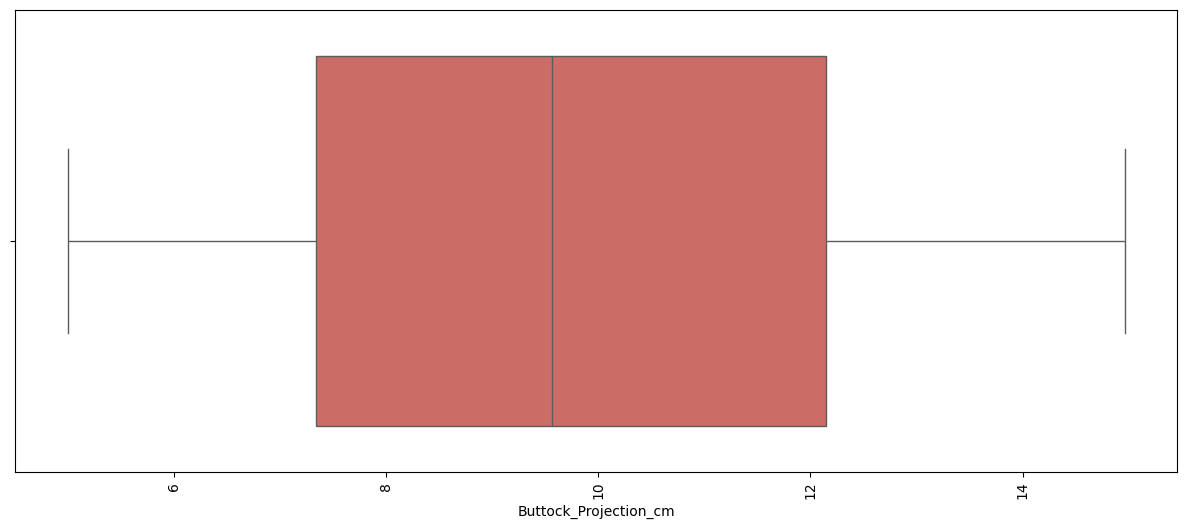

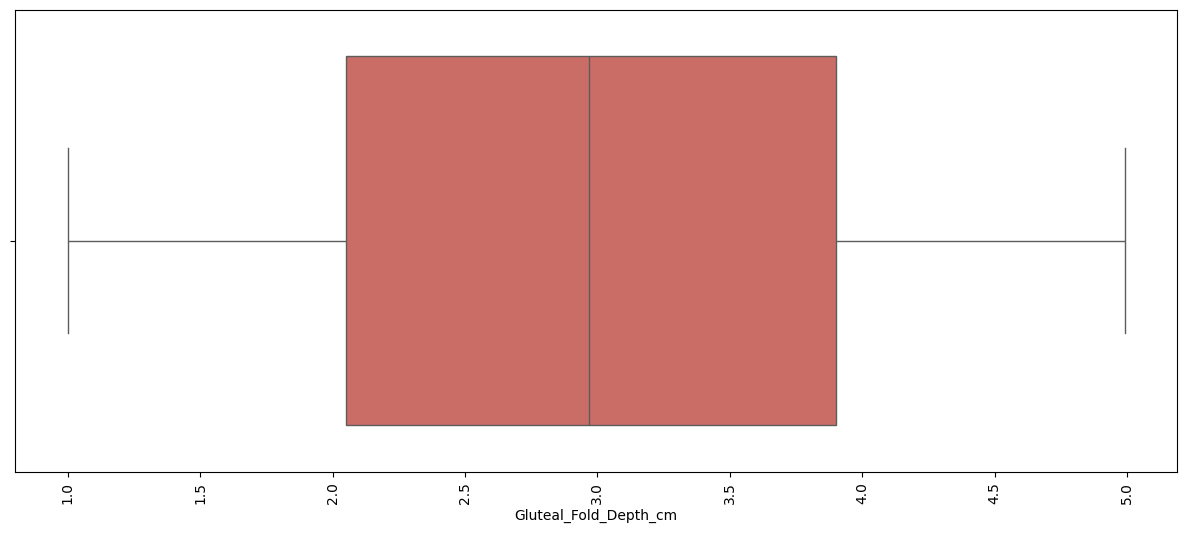

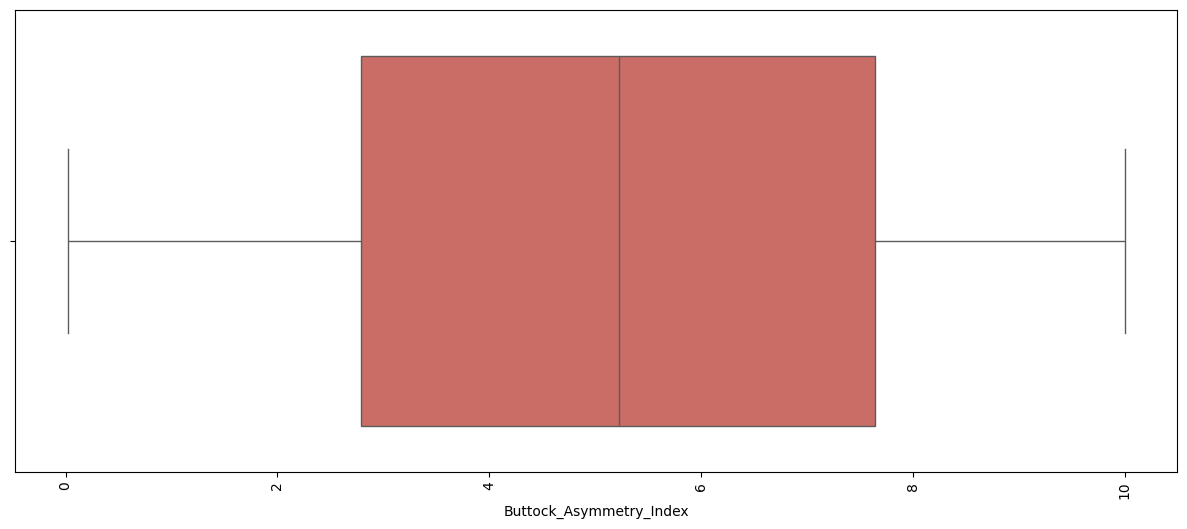

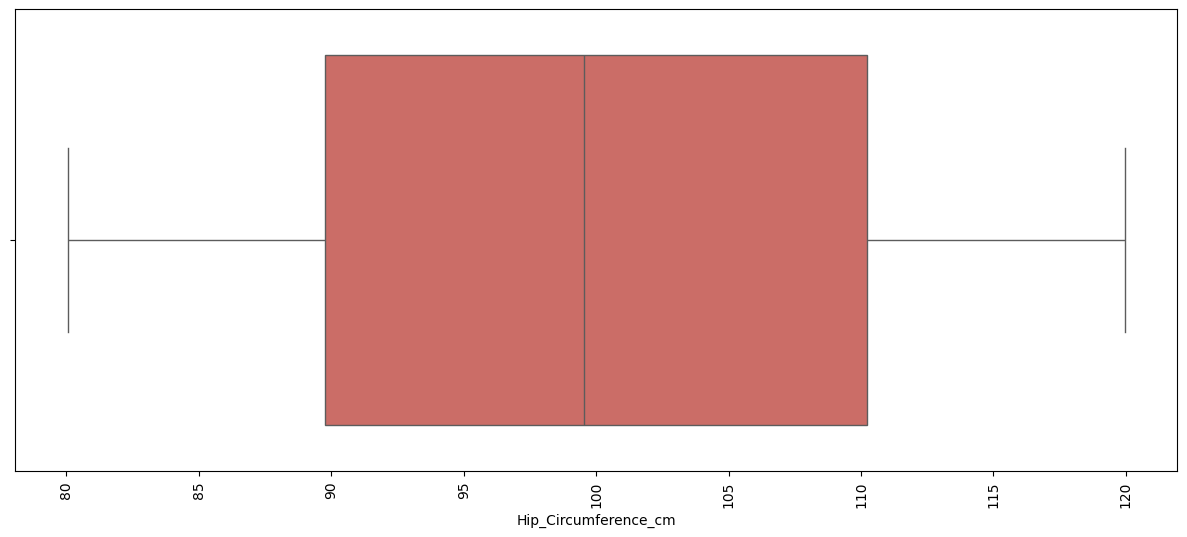

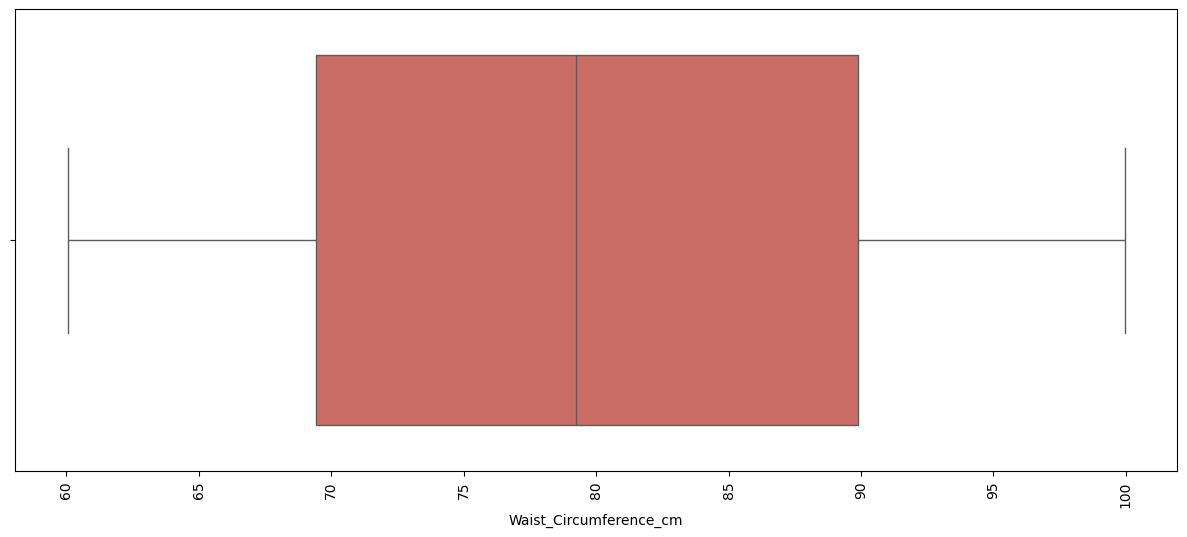

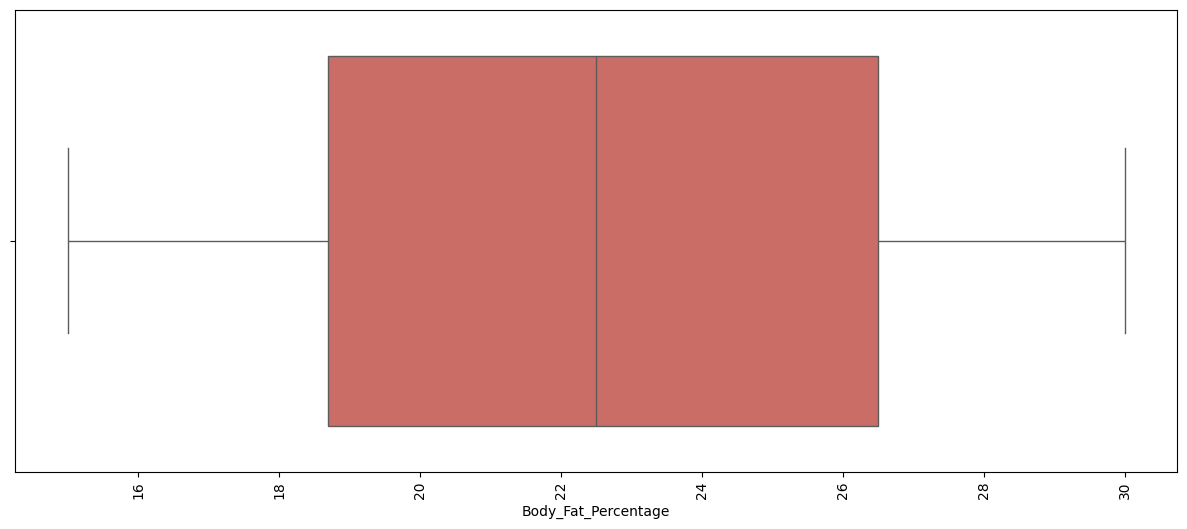

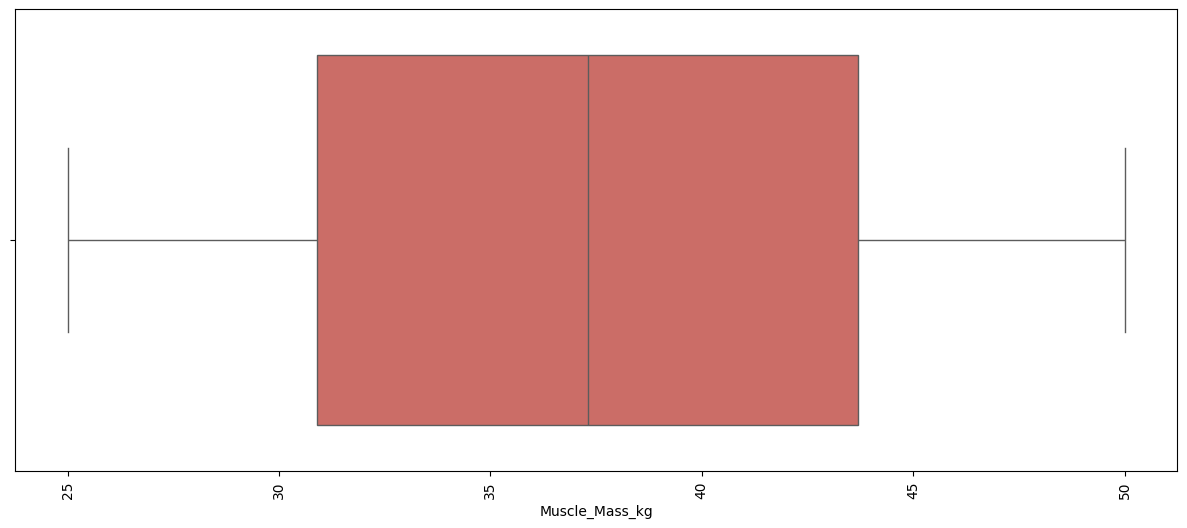

In [20]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

In [21]:
for i in discrete:
    print(i)
    print(df[i].unique())
    print()

Gym_Visits_per_Week
[2 3 4 6 5]



In [22]:
for i in discrete:
    print(i)
    print(df[i].value_counts())
    print()

Gym_Visits_per_Week
Gym_Visits_per_Week
5    210
6    206
4    203
3    195
2    186
Name: count, dtype: int64



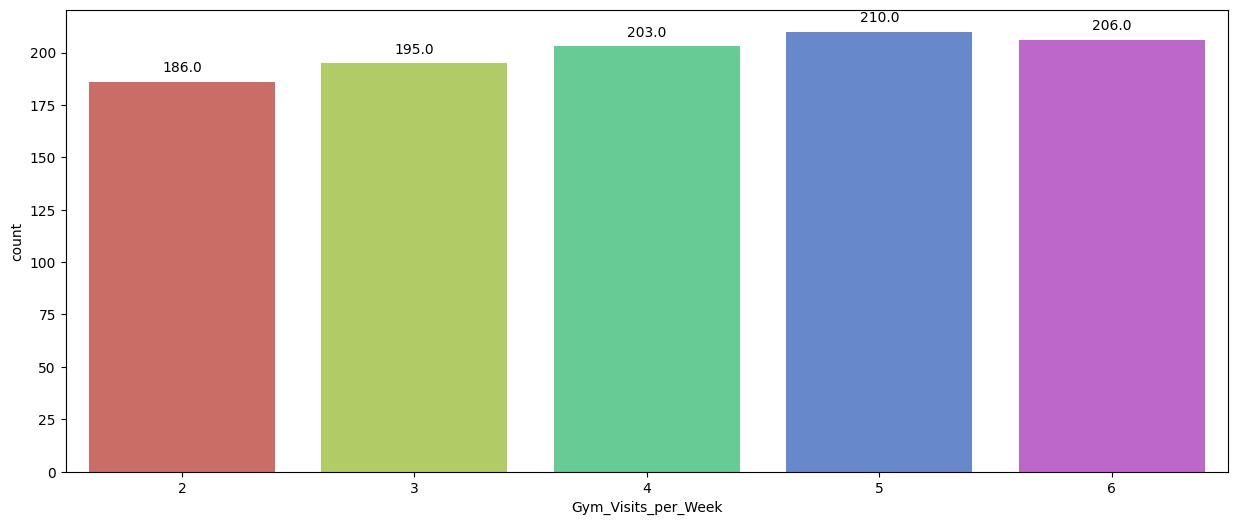

In [23]:
for i in discrete:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.show()

In [24]:


for i in discrete:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

In [25]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print()

Workout_Types
['Cardio' 'Strength' 'Flexibility' 'Group Classes']

Shape_Type
['Pear' 'Square' 'Heart' 'Round']

Glute_Activation_Level
['Low' 'High' 'Moderate']

Diet_Type
['Low Carb' 'High Protein' 'Balanced' 'Vegetarian']

Fitness_Goals
['Muscle Gain' 'Health' 'Weight Loss' 'Improve Endurance']



In [26]:
for i in categorical:
    print(i)
    print(df[i].value_counts())
    print()

Workout_Types
Workout_Types
Strength         256
Cardio           254
Flexibility      253
Group Classes    237
Name: count, dtype: int64

Shape_Type
Shape_Type
Heart     276
Round     253
Pear      240
Square    231
Name: count, dtype: int64

Glute_Activation_Level
Glute_Activation_Level
High        343
Low         335
Moderate    322
Name: count, dtype: int64

Diet_Type
Diet_Type
High Protein    278
Balanced        256
Low Carb        242
Vegetarian      224
Name: count, dtype: int64

Fitness_Goals
Fitness_Goals
Improve Endurance    270
Health               257
Weight Loss          249
Muscle Gain          224
Name: count, dtype: int64



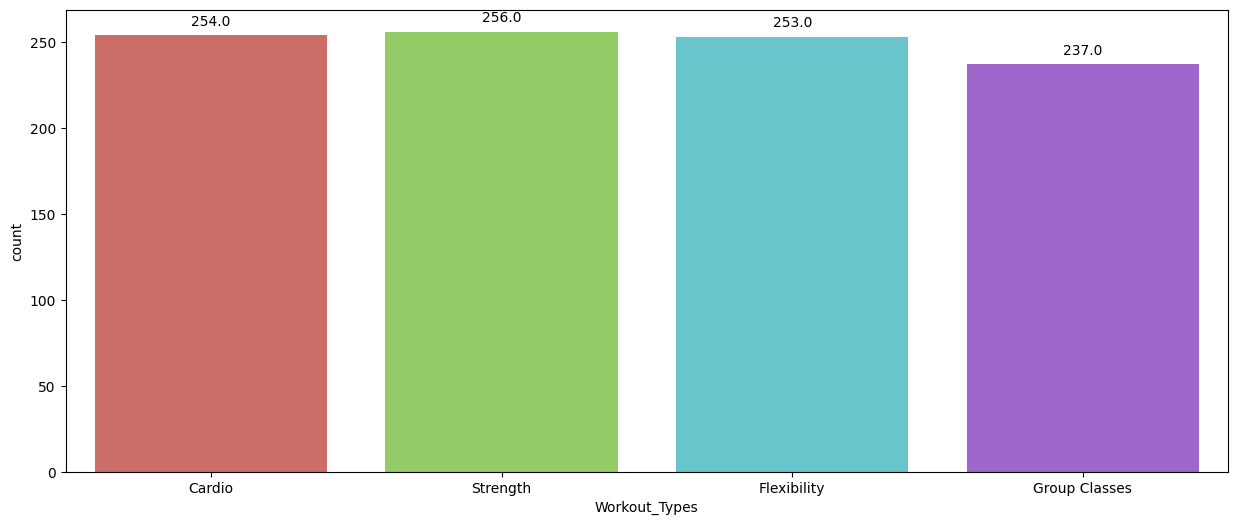

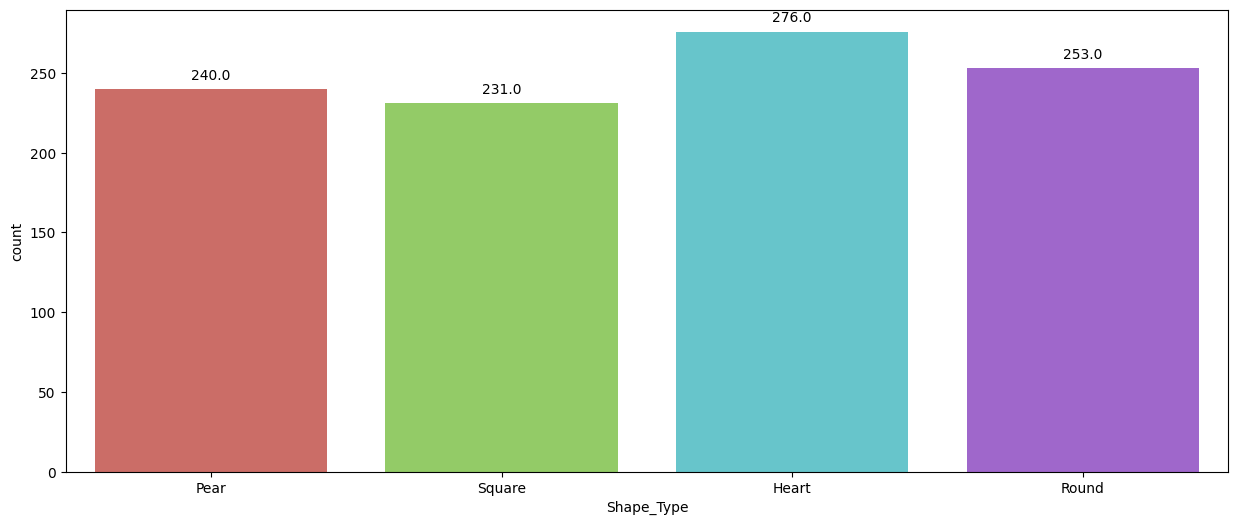

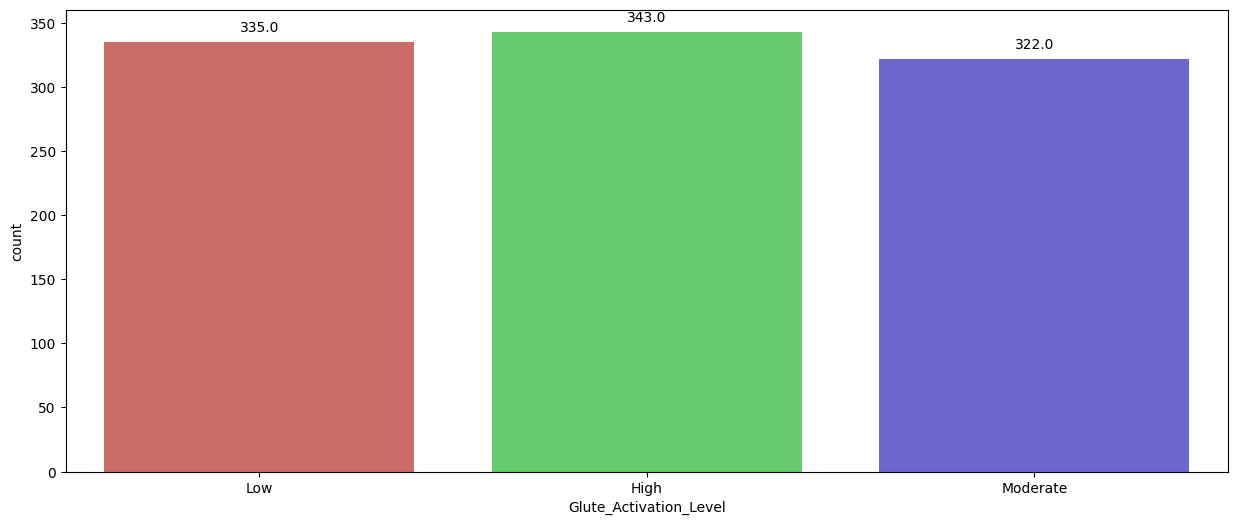

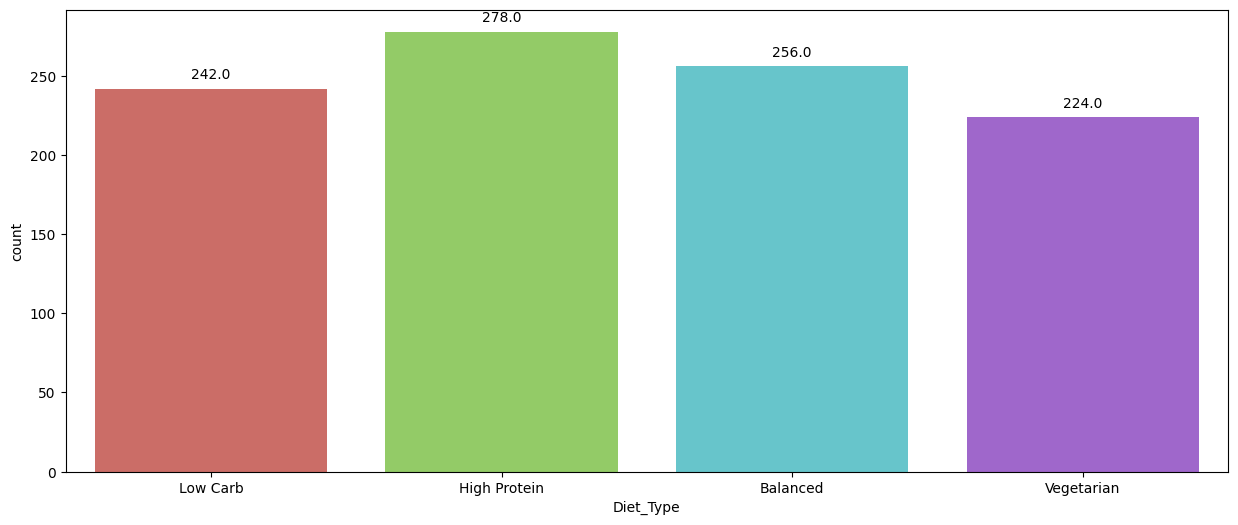

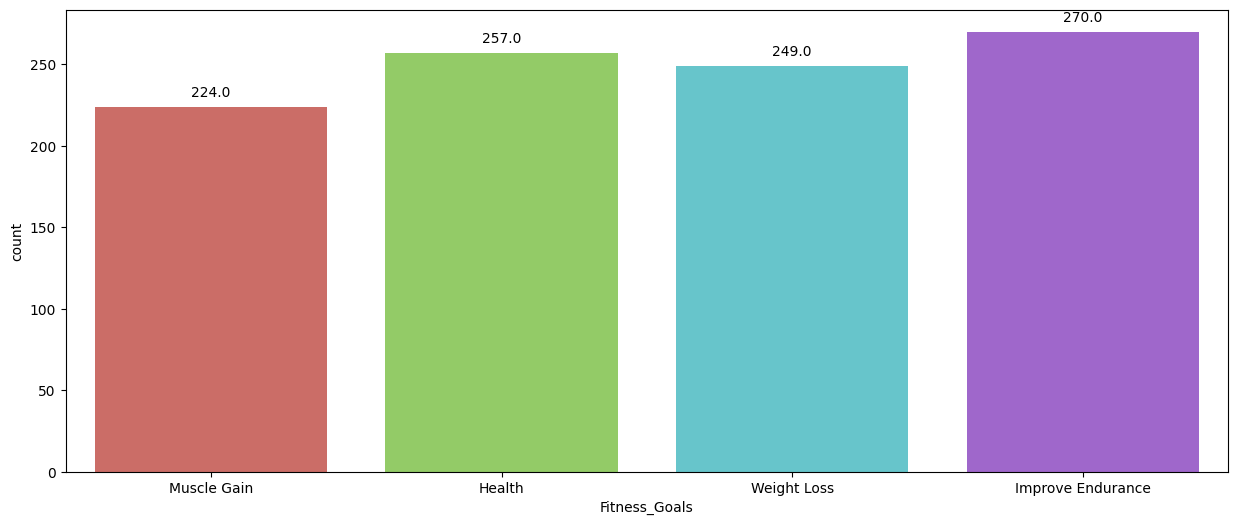

In [27]:
for i in categorical:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.show()

In [28]:
for i in categorical:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

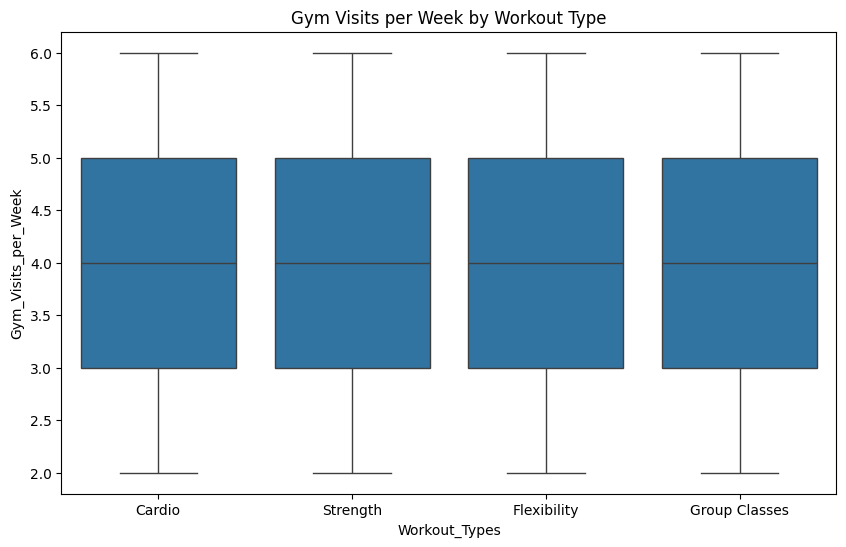

ANOVA result for Gym Visits per Week by Workout Type: p-value = 0.15191397341104193


In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Workout_Types', y='Gym_Visits_per_Week')
plt.title('Gym Visits per Week by Workout Type')
plt.xticks(rotation=0)
plt.show()

anova_result = f_oneway(*[df[df['Workout_Types'] == category]['Gym_Visits_per_Week'] for category in df['Workout_Types'].unique()])
print(f"ANOVA result for Gym Visits per Week by Workout Type: p-value = {anova_result.pvalue}")

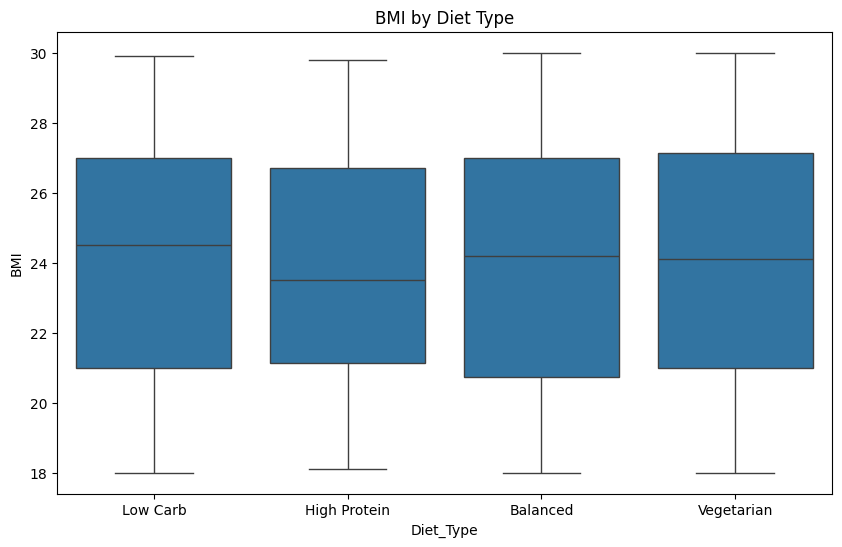

ANOVA result for BMI by Diet Type: p-value = 0.8748836119019182


In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Diet_Type', y='BMI')
plt.title('BMI by Diet Type')
plt.xticks(rotation=0)
plt.show()

anova_result = f_oneway(*[df[df['Diet_Type'] == category]['BMI'] for category in df['Diet_Type'].unique()])
print(f"ANOVA result for BMI by Diet Type: p-value = {anova_result.pvalue}")

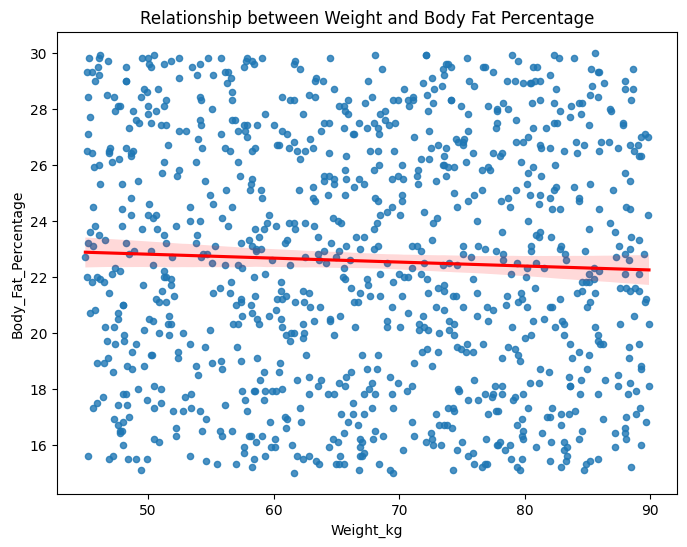

Pearson correlation: -0.04143317018513118, p-value: 0.19048173675033908


In [31]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Weight_kg', y='Body_Fat_Percentage', scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.title('Relationship between Weight and Body Fat Percentage')
plt.show()

corr, p_value = pearsonr(df['Weight_kg'], df['Body_Fat_Percentage'])
print(f"Pearson correlation: {corr}, p-value: {p_value}")

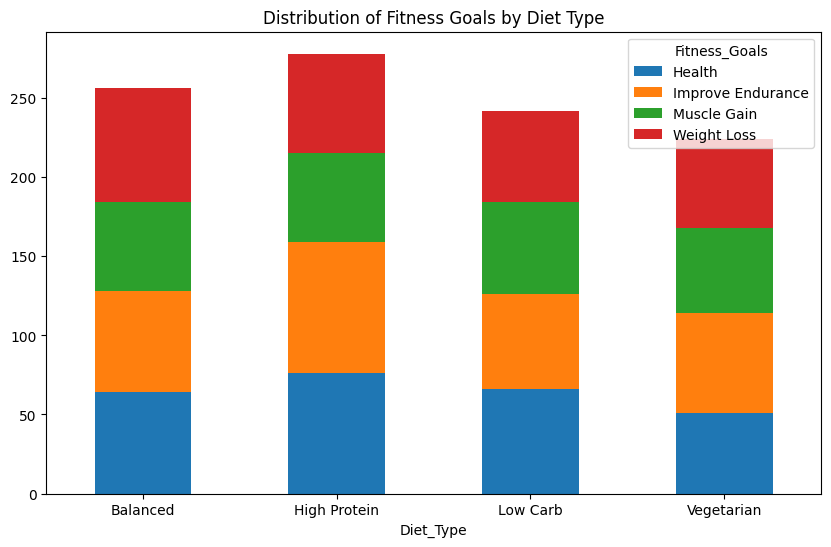

Chi-square test result: p-value = 0.7383244404897884


In [32]:
contingency_table = pd.crosstab(df['Diet_Type'], df['Fitness_Goals'])
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Fitness Goals by Diet Type')
plt.xticks(rotation=0)
plt.show()

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test result: p-value = {p}")

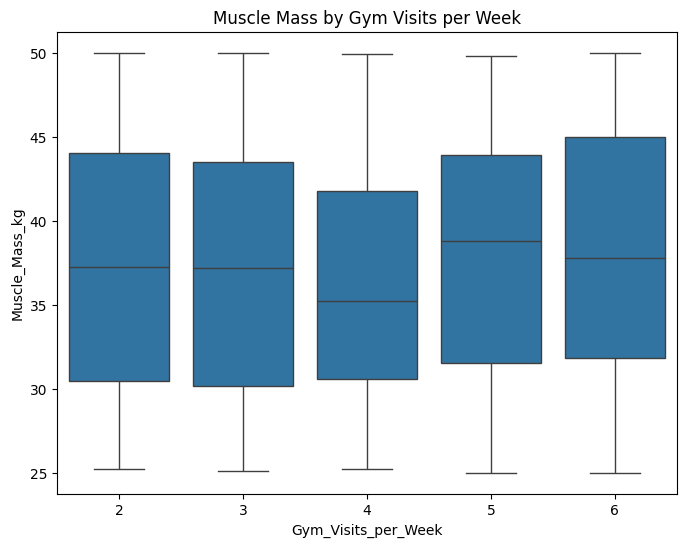

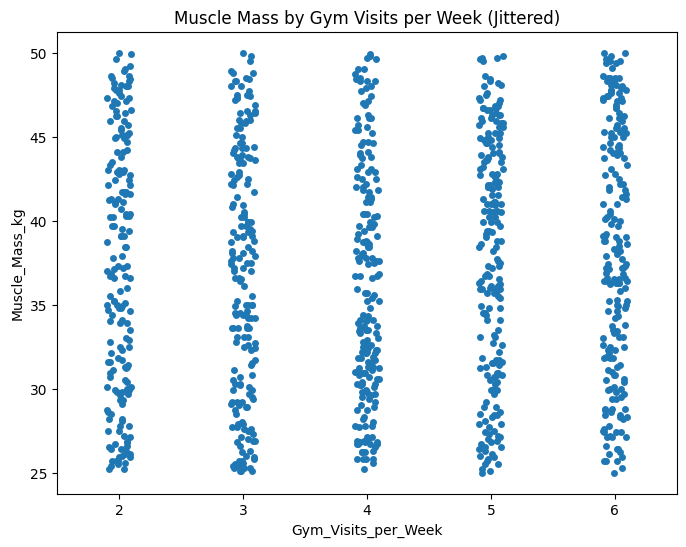

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gym_Visits_per_Week', y='Muscle_Mass_kg')
plt.title('Muscle Mass by Gym Visits per Week')
plt.show()

plt.figure(figsize=(8, 6))
sns.stripplot(data=df, x='Gym_Visits_per_Week', y='Muscle_Mass_kg', jitter=True)
plt.title('Muscle Mass by Gym Visits per Week (Jittered)')
plt.show()

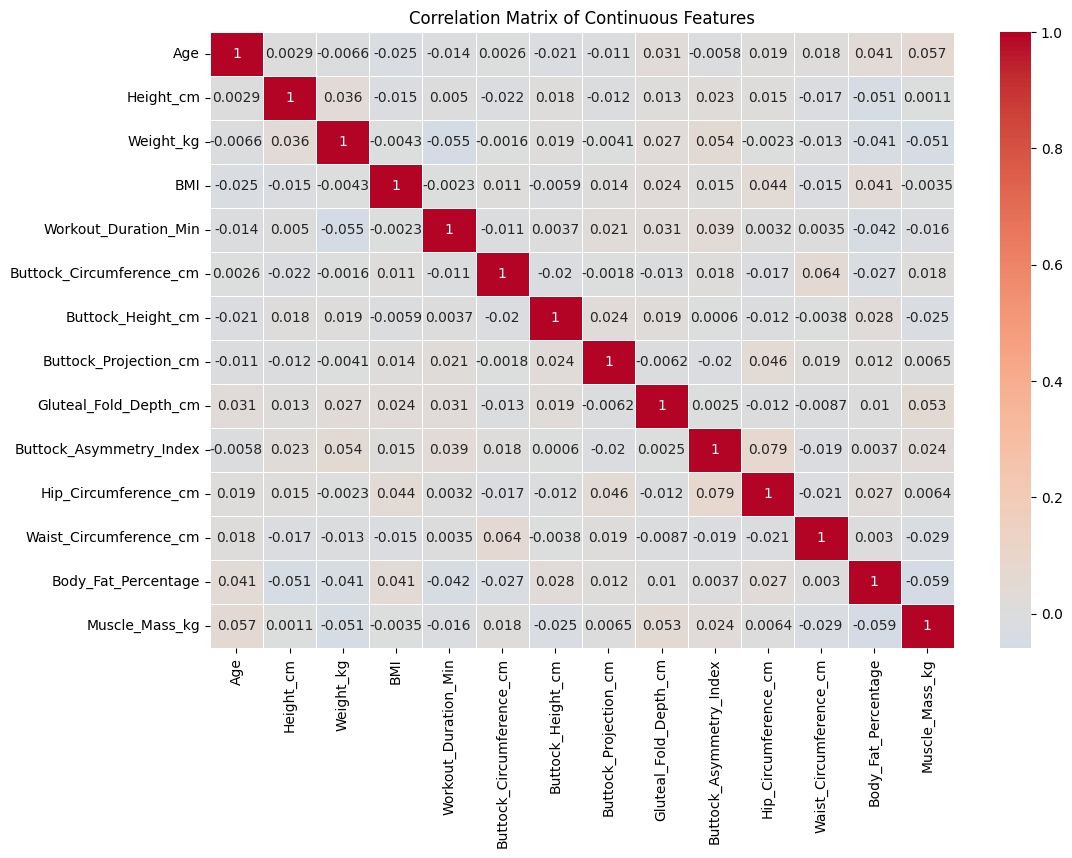

In [34]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[['Age', 'Height_cm', 'Weight_kg', 'BMI', 'Workout_Duration_Min', 
                         'Buttock_Circumference_cm', 'Buttock_Height_cm', 'Buttock_Projection_cm', 
                         'Gluteal_Fold_Depth_cm', 'Buttock_Asymmetry_Index', 'Hip_Circumference_cm', 
                         'Waist_Circumference_cm', 'Body_Fat_Percentage', 'Muscle_Mass_kg']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix of Continuous Features')
plt.show()

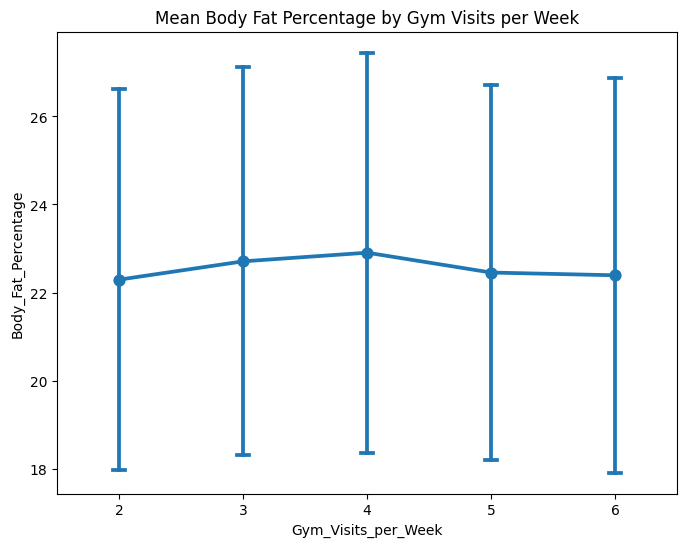

In [35]:
plt.figure(figsize=(8, 6))
sns.pointplot(data=df, x='Gym_Visits_per_Week', y='Body_Fat_Percentage', ci='sd', capsize=0.1)
plt.title('Mean Body Fat Percentage by Gym Visits per Week')
plt.show()

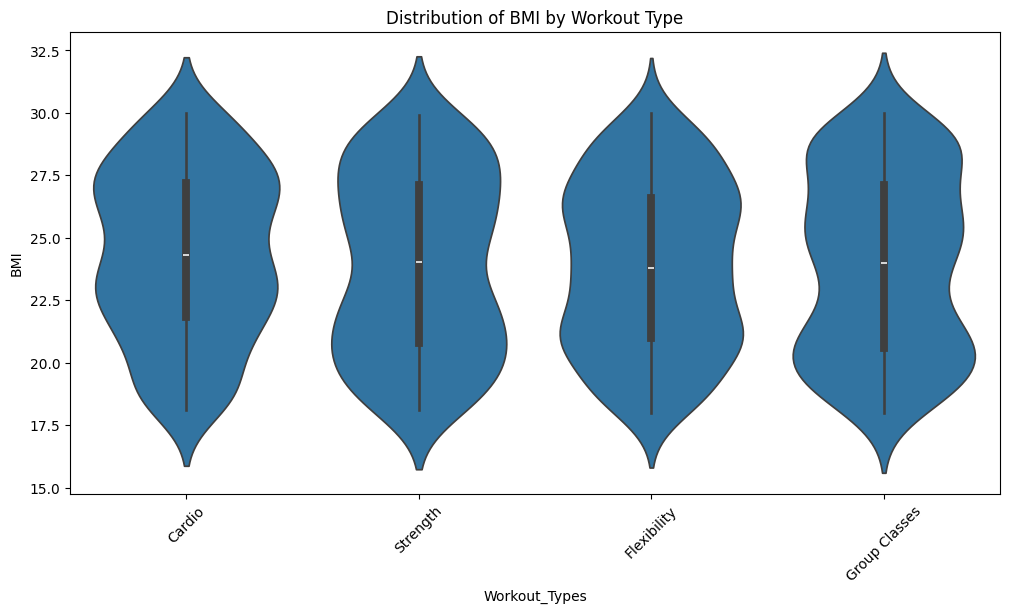

In [36]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Workout_Types', y='BMI')
plt.title('Distribution of BMI by Workout Type')
plt.xticks(rotation=45)
plt.show()

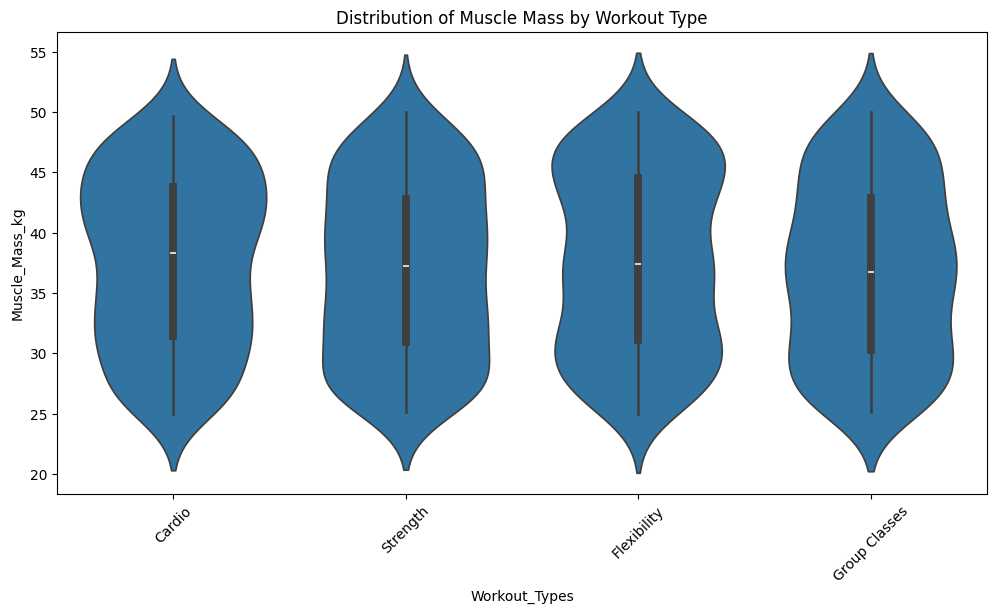

In [37]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Workout_Types', y='Muscle_Mass_kg')
plt.title('Distribution of Muscle Mass by Workout Type')
plt.xticks(rotation=45)
plt.show()

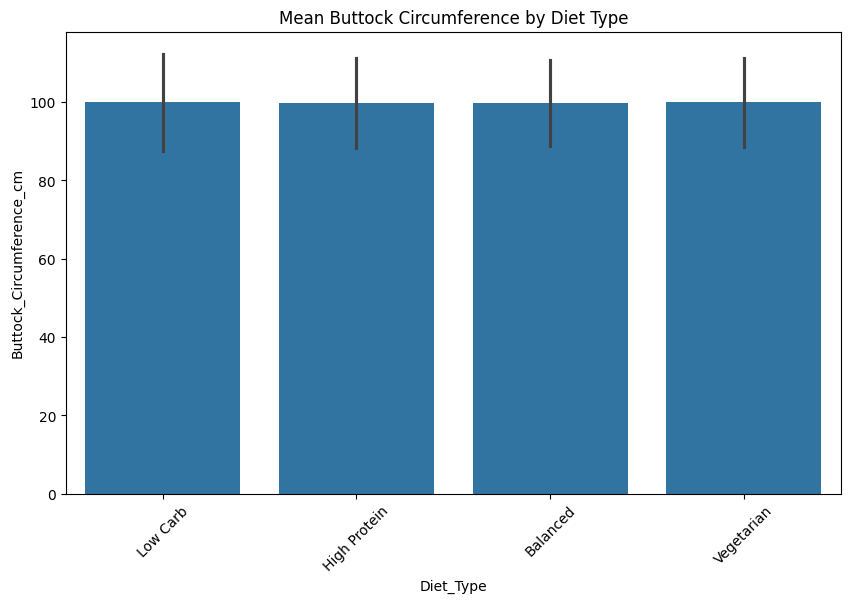

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Diet_Type', y='Buttock_Circumference_cm', ci='sd')
plt.title('Mean Buttock Circumference by Diet Type')
plt.xticks(rotation=45)
plt.show()

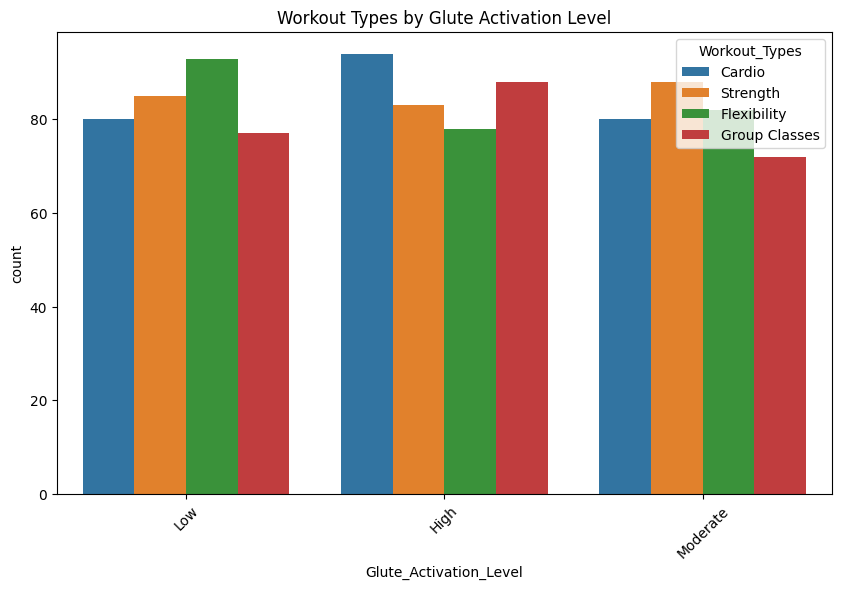

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Glute_Activation_Level', hue='Workout_Types')
plt.title('Workout Types by Glute Activation Level')
plt.xticks(rotation=45)
plt.show()

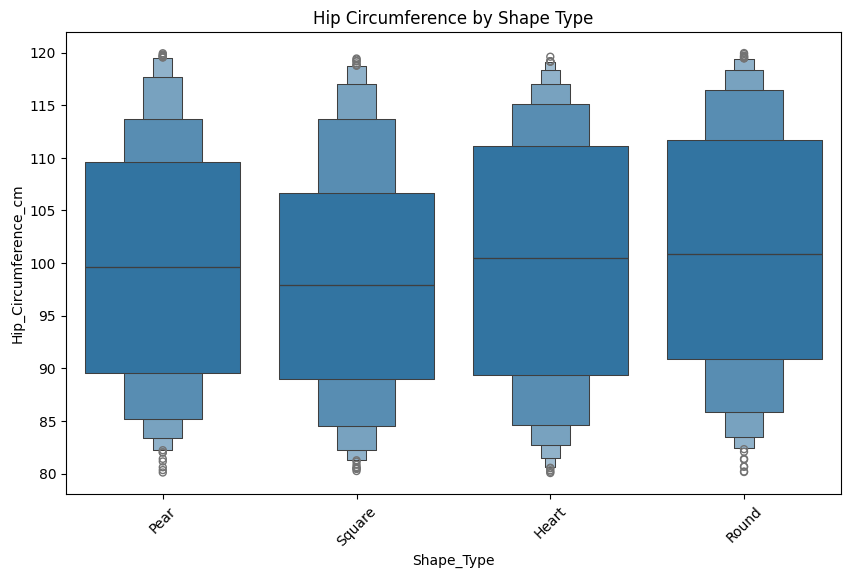

In [40]:
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df, x='Shape_Type', y='Hip_Circumference_cm')
plt.title('Hip Circumference by Shape Type')
plt.xticks(rotation=45)
plt.show()

In [41]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

confusion_matrix = pd.crosstab(df['Diet_Type'], df['Glute_Activation_Level'])
cramers_v_value = cramers_v(confusion_matrix.values)
print(f"Cramér's V for association between Diet Type and Glute Activation Level: {cramers_v_value}")

Cramér's V for association between Diet Type and Glute Activation Level: 0.07462396735946523


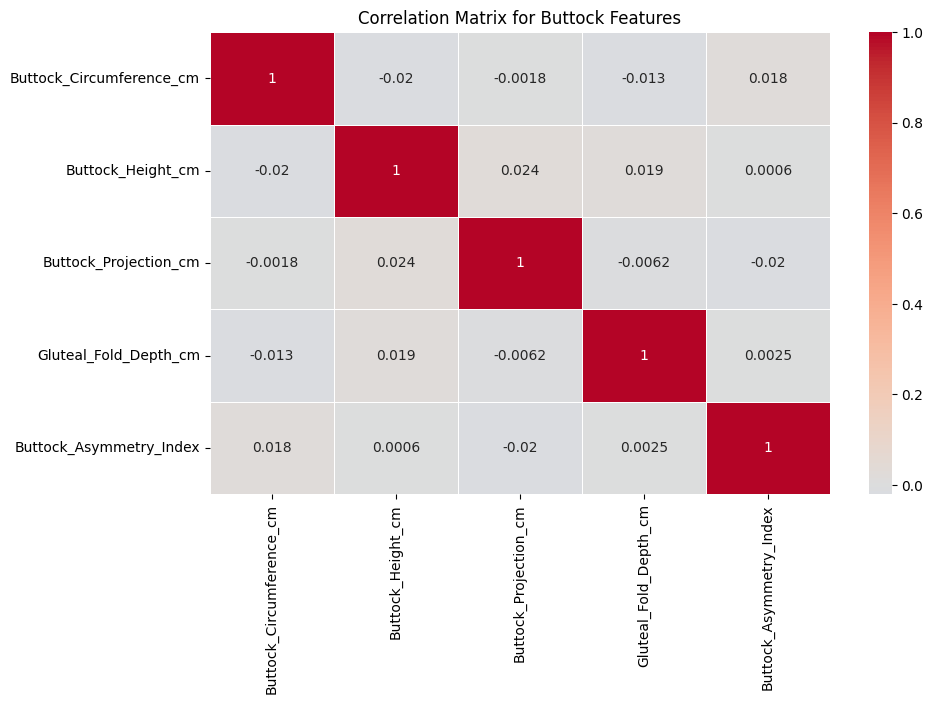

In [42]:
plt.figure(figsize=(10, 6))
buttock_features = df[['Buttock_Circumference_cm', 'Buttock_Height_cm', 'Buttock_Projection_cm', 
                       'Gluteal_Fold_Depth_cm', 'Buttock_Asymmetry_Index']]
correlation_matrix = buttock_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix for Buttock Features')
plt.show()

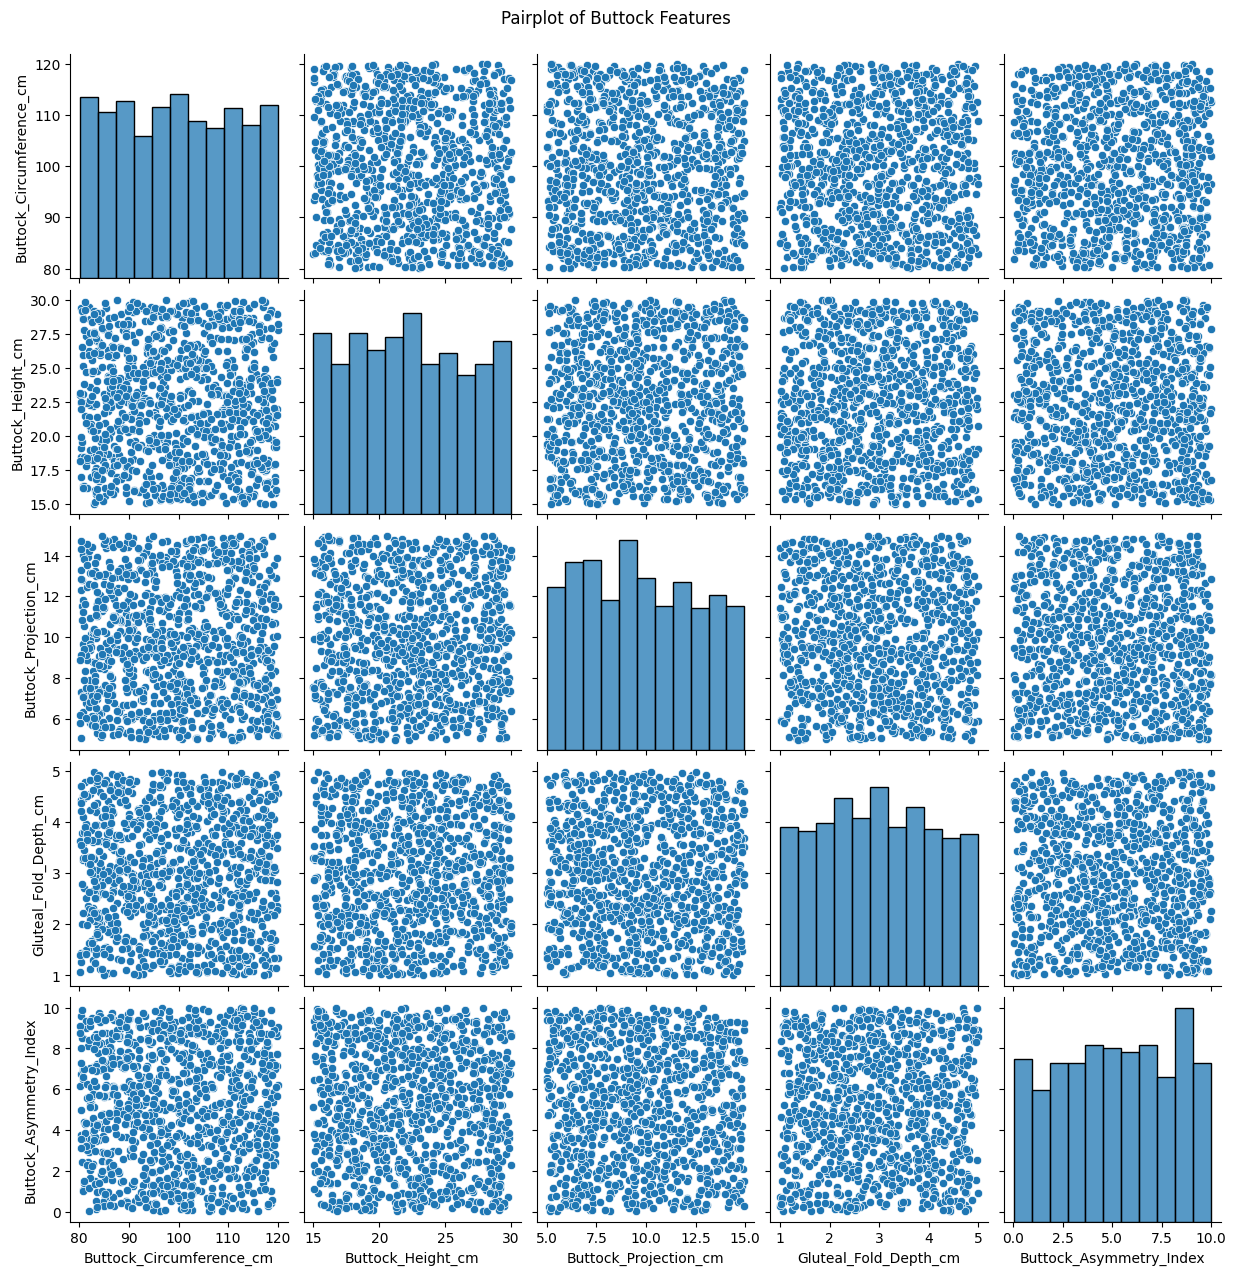

In [43]:
sns.pairplot(buttock_features)
plt.suptitle('Pairplot of Buttock Features', y=1.02)
plt.show()

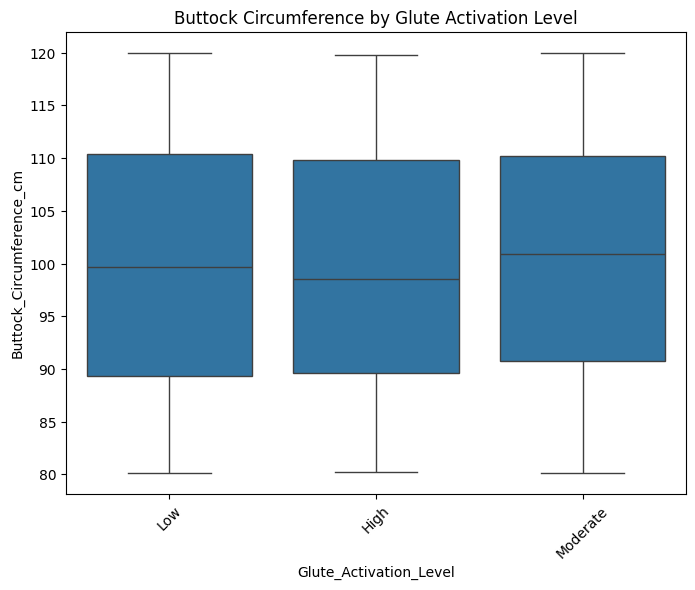

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Glute_Activation_Level', y='Buttock_Circumference_cm')
plt.title('Buttock Circumference by Glute Activation Level')
plt.xticks(rotation=45)
plt.show()

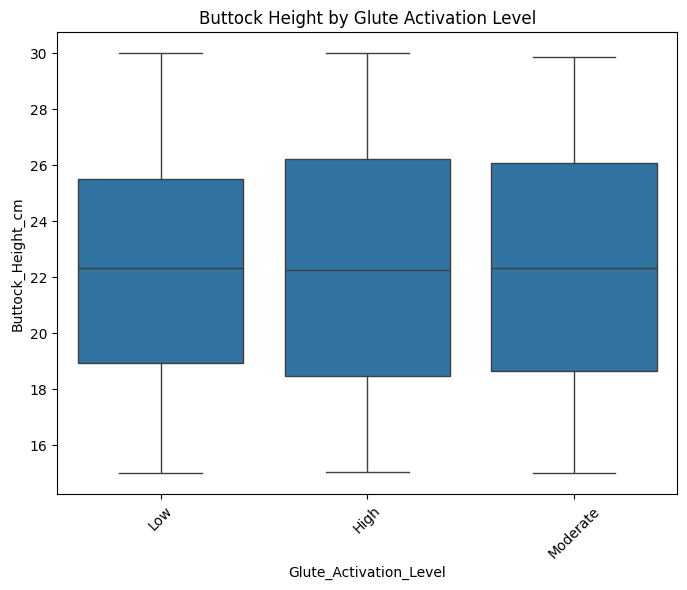

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Glute_Activation_Level', y='Buttock_Height_cm')
plt.title('Buttock Height by Glute Activation Level')
plt.xticks(rotation=45)
plt.show()

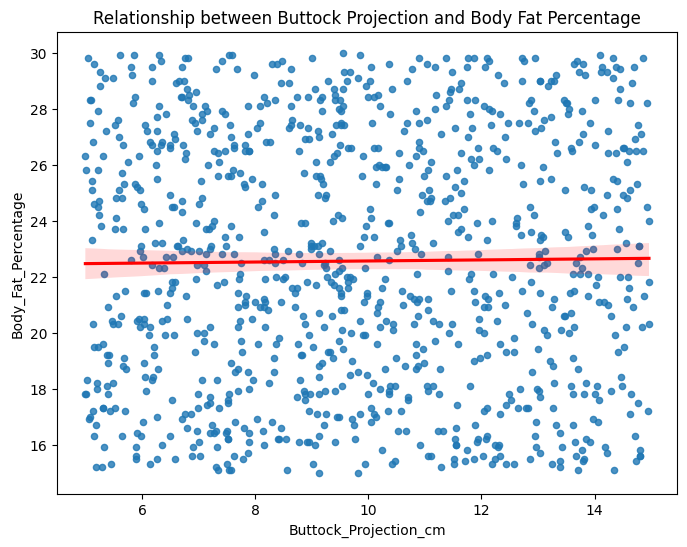

Pearson correlation between Buttock Projection and Body Fat Percentage: 0.012234052807446532, p-value: 0.6991965200034748


In [46]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Buttock_Projection_cm', y='Body_Fat_Percentage', scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.title('Relationship between Buttock Projection and Body Fat Percentage')
plt.show()


corr, p_value = pearsonr(df['Buttock_Projection_cm'], df['Body_Fat_Percentage'])
print(f"Pearson correlation between Buttock Projection and Body Fat Percentage: {corr}, p-value: {p_value}")

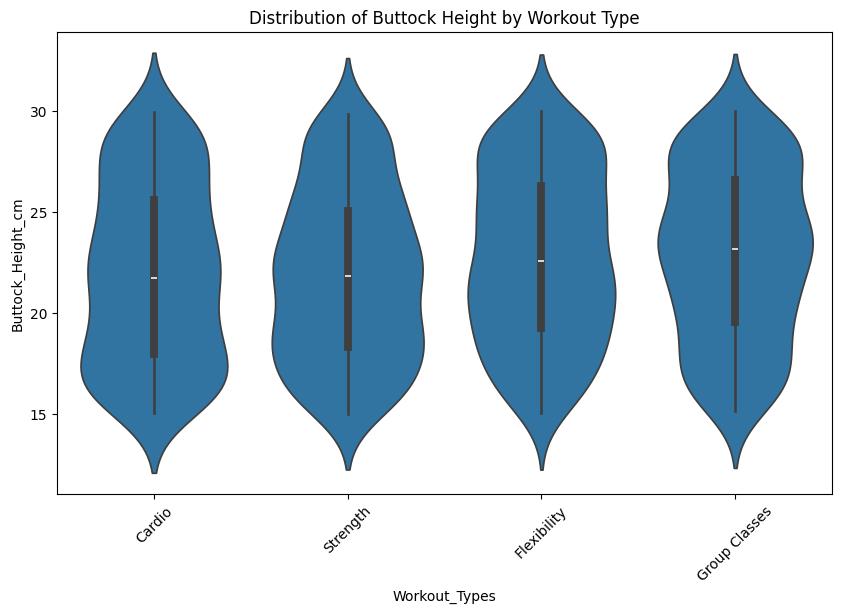

In [47]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Workout_Types', y='Buttock_Height_cm')
plt.title('Distribution of Buttock Height by Workout Type')
plt.xticks(rotation=45)
plt.show()

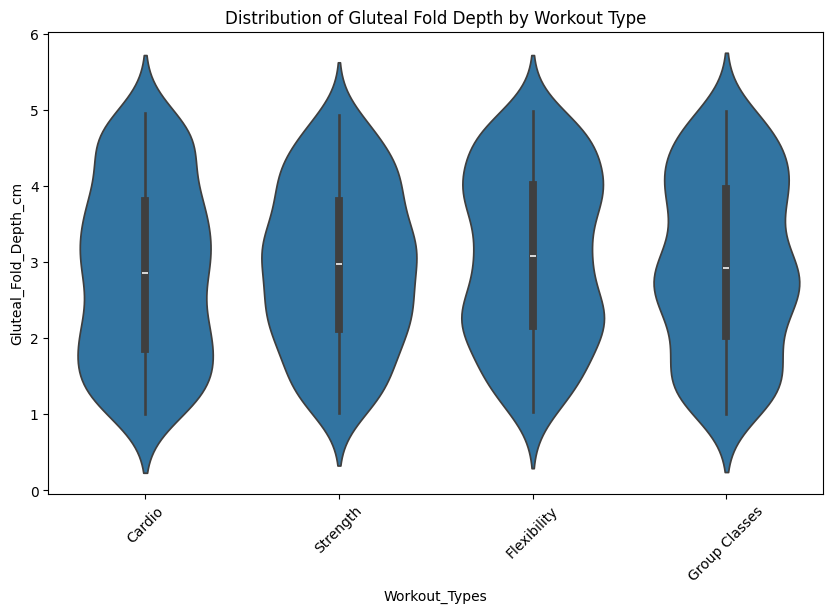

In [48]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Workout_Types', y='Gluteal_Fold_Depth_cm')
plt.title('Distribution of Gluteal Fold Depth by Workout Type')
plt.xticks(rotation=45)
plt.show()

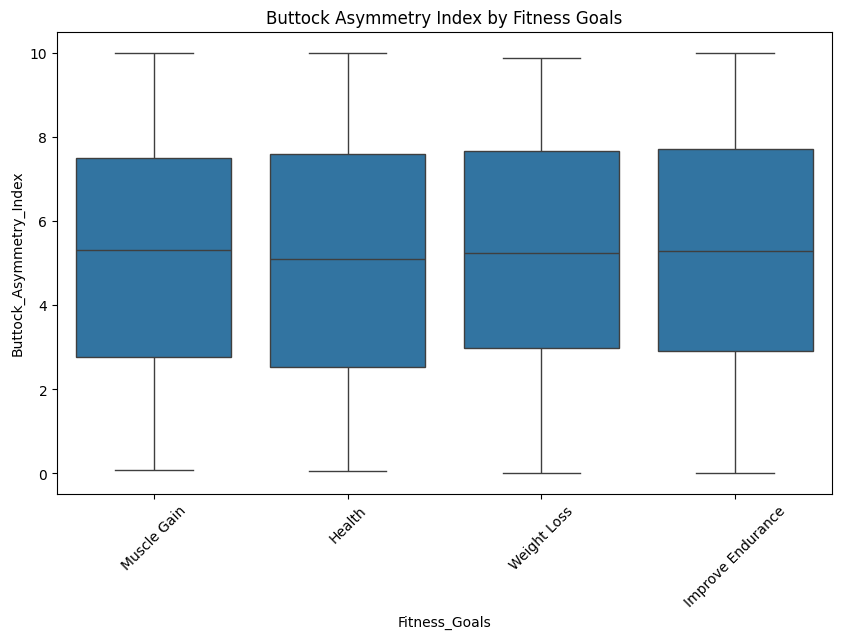

ANOVA result for Buttock Asymmetry Index by Fitness Goals: p-value = 0.9077696911971008


In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Fitness_Goals', y='Buttock_Asymmetry_Index')
plt.title('Buttock Asymmetry Index by Fitness Goals')
plt.xticks(rotation=45)
plt.show()

anova_result = f_oneway(*[df[df['Fitness_Goals'] == goal]['Buttock_Asymmetry_Index'] for goal in df['Fitness_Goals'].unique()])
print(f"ANOVA result for Buttock Asymmetry Index by Fitness Goals: p-value = {anova_result.pvalue}")

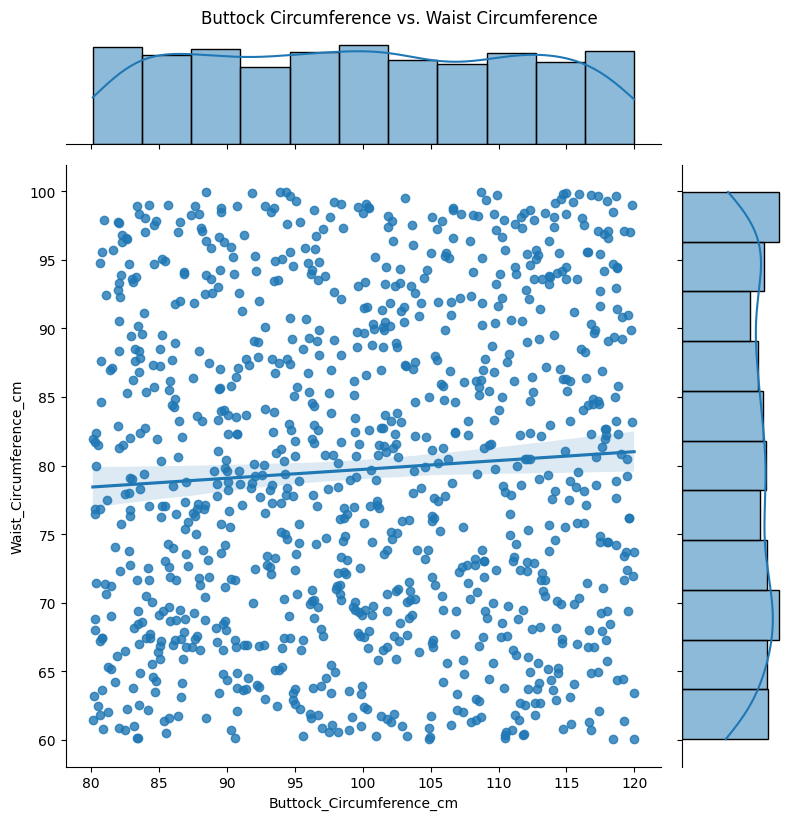

Pearson correlation between Buttock Circumference and Waist Circumference: 0.06371692392534745, p-value: 0.04396407809031124


In [50]:
sns.jointplot(data=df, x='Buttock_Circumference_cm', y='Waist_Circumference_cm', kind='reg', height=8)
plt.suptitle('Buttock Circumference vs. Waist Circumference', y=1.02)
plt.show()

corr, p_value = pearsonr(df['Buttock_Circumference_cm'], df['Waist_Circumference_cm'])
print(f"Pearson correlation between Buttock Circumference and Waist Circumference: {corr}, p-value: {p_value}")

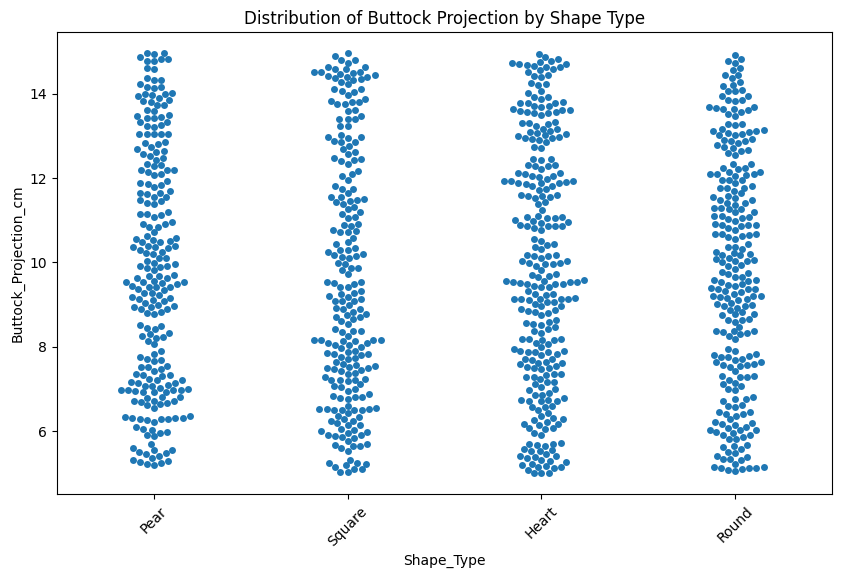

In [51]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='Shape_Type', y='Buttock_Projection_cm')
plt.title('Distribution of Buttock Projection by Shape Type')
plt.xticks(rotation=45)
plt.show()

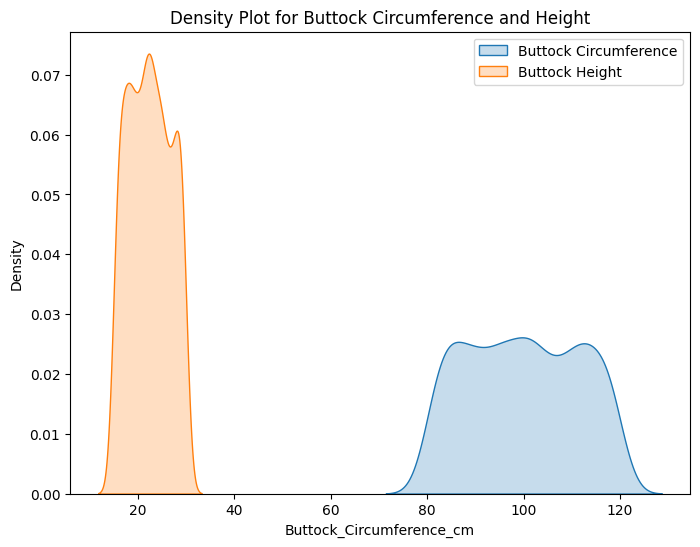

In [52]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Buttock_Circumference_cm'], label='Buttock Circumference', shade=True)
sns.kdeplot(df['Buttock_Height_cm'], label='Buttock Height', shade=True)
plt.title('Density Plot for Buttock Circumference and Height')
plt.legend()
plt.show()

In [53]:
pivot_1 = df.pivot_table(
    values='Buttock_Circumference_cm', 
    index='Glute_Activation_Level', 
    columns='Workout_Types', 
    aggfunc='mean'
).round(2)

print(pivot_1)

Workout_Types           Cardio  Flexibility  Group Classes  Strength
Glute_Activation_Level                                              
High                    100.21        99.33          99.33     99.32
Low                     101.65        98.23          99.50     99.40
Moderate                 99.68       100.24         100.16    101.67


In [54]:
pivot_3 = df.pivot_table(
    values='Gym_Visits_per_Week', 
    index='Diet_Type', 
    columns='Fitness_Goals', 
    aggfunc='sum',
    fill_value=0
)

print(pivot_3)

Fitness_Goals  Health  Improve Endurance  Muscle Gain  Weight Loss
Diet_Type                                                         
Balanced          269                249          222          315
High Protein      308                342          230          247
Low Carb          255                226          238          224
Vegetarian        236                252          214          228


In [55]:
pivot_4 = df.pivot_table(
    values=['Buttock_Projection_cm', 'Gluteal_Fold_Depth_cm'], 
    index='Shape_Type', 
    aggfunc='mean'
).round(2)

print(pivot_4)

            Buttock_Projection_cm  Gluteal_Fold_Depth_cm
Shape_Type                                              
Heart                        9.88                   2.99
Pear                         9.83                   2.94
Round                        9.81                   3.02
Square                       9.64                   2.92


In [56]:
pivot_5 = df.pivot_table(
    values='Buttock_Asymmetry_Index', 
    index='Workout_Types', 
    columns='Glute_Activation_Level', 
    aggfunc='median'
).round(2)

print(pivot_5)

Glute_Activation_Level  High   Low  Moderate
Workout_Types                               
Cardio                  5.46  5.14      5.01
Flexibility             4.96  5.58      5.50
Group Classes           5.22  5.53      5.14
Strength                5.29  5.06      4.53


In [57]:
pivot_6 = df.pivot_table(
    values='Buttock_Height_cm', 
    index='Fitness_Goals', 
    columns='Diet_Type', 
    aggfunc='max'
).round(2)

print(pivot_6)

Diet_Type          Balanced  High Protein  Low Carb  Vegetarian
Fitness_Goals                                                  
Health                29.84         29.63     29.52       29.98
Improve Endurance     29.96         29.88     29.95       29.85
Muscle Gain           29.99         29.81     29.84       29.78
Weight Loss           29.75         29.34     29.76       29.64


In [58]:
pivot_7 = df.pivot_table(
    values=['Buttock_Circumference_cm', 'Body_Fat_Percentage'], 
    index='Workout_Types', 
    aggfunc='mean'
).round(2)

print(pivot_7)

               Body_Fat_Percentage  Buttock_Circumference_cm
Workout_Types                                               
Cardio                       22.46                    100.50
Flexibility                  22.39                     99.22
Group Classes                22.96                     99.64
Strength                     22.43                    100.15


In [59]:
pivot_8 = df.pivot_table(
    values='Buttock_Circumference_cm', 
    index='Glute_Activation_Level', 
    aggfunc='std'
).round(2)

print(pivot_8)

                        Buttock_Circumference_cm
Glute_Activation_Level                          
High                                       11.48
Low                                        11.96
Moderate                                   11.27


In [60]:
df['Shape_Type'] = LabelEncoder().fit_transform(df['Shape_Type'])

In [61]:
features = ['Buttock_Height_cm', 'Buttock_Projection_cm', 'Hip_Circumference_cm', 
            'Body_Fat_Percentage', 'Muscle_Mass_kg']
target = 'Shape_Type'

In [62]:
X = df[features]
y = df[target]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [64]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
y_pred = rf_model.predict(X_test)

In [66]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 20.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.24      0.22        55
           1       0.20      0.19      0.19        48
           2       0.16      0.16      0.16        51
           3       0.24      0.22      0.23        46

    accuracy                           0.20       200
   macro avg       0.20      0.20      0.20       200
weighted avg       0.20      0.20      0.20       200



In [67]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify = y, random_state=42)

In [69]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [70]:
y_pred = logistic_model.predict(X_test)

In [71]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#print("\nConfusion Matrix:")
#print(confusion_matrix(y_test, y_pred))

Accuracy: 23.50%

Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.47      0.32        55
           1       0.11      0.04      0.06        48
           2       0.30      0.31      0.31        51
           3       0.15      0.07      0.09        46

    accuracy                           0.23       200
   macro avg       0.20      0.22      0.19       200
weighted avg       0.20      0.23      0.20       200



In [72]:
features = ['Age', 'Height_cm', 'Weight_kg', 'BMI', 'Workout_Duration_Min', 
            'Buttock_Height_cm', 'Buttock_Projection_cm', 'Gluteal_Fold_Depth_cm', 
            'Body_Fat_Percentage', 'Muscle_Mass_kg']

target = 'Buttock_Circumference_cm'

df_log_transformed = df.copy()
df_log_transformed[features] = df_log_transformed[features].apply(lambda x: np.log(x + 1))

X = df_log_transformed[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [74]:
y_pred = model.predict(X_test)

In [75]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error = {mae:.2f}")
print(f"Mean Squared Error = {mse:.2f}")

Mean Absolute Error = 10.30
Mean Squared Error = 140.89


# Thanks !!!